In [1]:
%reset -f
%reload_ext autoreload
%autoreload 2

import os
import sys
import importlib
import numpy as np
import pandas as pd

# === Setup ===
# Might need to change to main directory of MolFeatures
ROOT_DIR = os.getcwd()
print(ROOT_DIR)
sys.path.append(ROOT_DIR)
sys.path.append(os.path.join(ROOT_DIR, 'M3_modeler'))
sys.path.append(os.path.join(ROOT_DIR, 'M2_data_extractor'))
sys.path.append(os.path.join(ROOT_DIR, 'utils'))

os.chdir(ROOT_DIR)  # Set working directory

# === Clear old module caches ===
for module in ['data_extractor', 'feather_extractor', 'gaussian_handler', 'help_functions', 'modeling', 'plot']:
    sys.modules.pop(module, None)

# === Safe Imports ===
try:

    from help_functions import dict_to_horizontal_df, get_df_from_file, pick_samples_to_remove_for_distribution, add_output_column_csv
    from modeling import (
        ClassificationModel,
        LinearRegressionModel,
        fit_and_evaluate_single_combination_regression,
        fit_and_evaluate_single_combination_classification
        
    )
    import plot
except ModuleNotFoundError as e:
    print(f"Module import failed: {e} \nPlease ensure all required modules are installed and available in the path specified on the right hand corner of the notebook.")

# === Config ===
pd.set_option('display.max_columns', None)



c:\Users\edens\Documents\GitHub\LabCode\MolFeatures


In the next part, an example file from directory modeling_example is used, but you can pick any csv, just specify the correct path.

**Note that you need to have an output column values in order to create a model, either add manually, or in target_csv_filepath enter the location of the output csv**

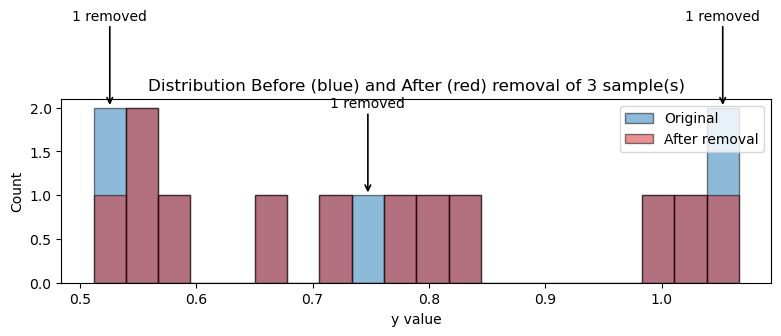

In [ ]:

modeling_example_dir = os.path.join(ROOT_DIR,'modeling_example')
csv_path=os.path.join(modeling_example_dir, 'Linear_Dataset_Example.csv')
csv_filepaths = {
'features_csv_filepath': csv_path,
'target_csv_filepath': ''
}
features_df=pd.read_csv(csv_path, index_col=0)
y=features_df['output']
samples_to_remove = pick_samples_to_remove_for_distribution(y, n_remove=3)


Database already exists at: results_Linear_Dataset_Example.db
Table 'regression_results' has been ensured to exist.
linear model selected

--- Correlation Report ---
Features with correlation above 0.8:
['-2-9-', '-1-2-']



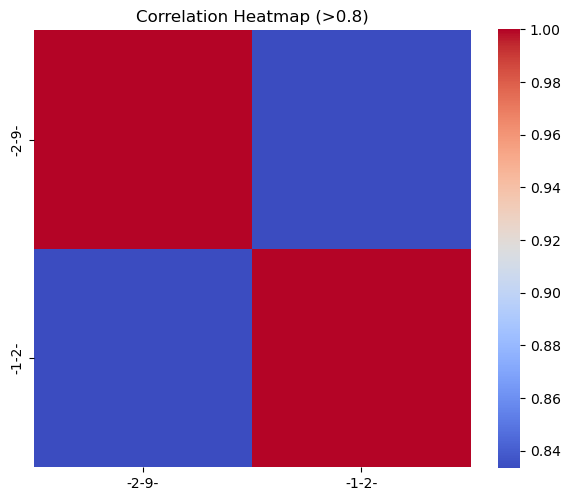


Correlated features were not dropped.

Using 1 jobs for evaluation. Found 20 cores.
Loaded 398 existing results from DB.
Combos to run: 7170, done_combos: 398
Evaluating 7170 new combos with R2 >= 0.700...


Threshold 0.700 (single-core):   0%|          | 5/7170 [00:00<02:23, 49.85it/s]

Using Leave-One-Out cross-validation (LOO)...
R2:0.809 Q2: 0.534, MAE: 0.109, RMSD: 0.130 for combination: ('cross', 'para', 'Dist(2, 9)', 'Dist(18, 20)')
Using Leave-One-Out cross-validation (LOO)...
R2:0.829 Q2: 0.533, MAE: 0.112, RMSD: 0.130 for combination: ('cross', 'para', 'Dist(2, 9)', 'Dist(16, 17)')
Using Leave-One-Out cross-validation (LOO)...
R2:0.701 Q2: -0.380, MAE: 0.195, RMSD: 0.223 for combination: ('cross', 'para', 'Dist(2, 9)', 'B1')
Using Leave-One-Out cross-validation (LOO)...
R2:0.710 Q2: 0.018, MAE: 0.167, RMSD: 0.188 for combination: ('cross', 'para', 'Dist(2, 9)', 'B5')
Using Leave-One-Out cross-validation (LOO)...
R2:0.772 Q2: 0.082, MAE: 0.147, RMSD: 0.182 for combination: ('cross', 'para', 'Dist(18, 20)', 'Dist(16, 17)')


Threshold 0.700 (single-core):   0%|          | 24/7170 [00:00<02:06, 56.29it/s]

Using Leave-One-Out cross-validation (LOO)...
R2:0.713 Q2: 0.079, MAE: 0.162, RMSD: 0.182 for combination: ('cross', 'para', 'Dist(18, 20)', 'dip_y')
Using Leave-One-Out cross-validation (LOO)...
R2:0.740 Q2: 0.302, MAE: 0.127, RMSD: 0.159 for combination: ('cross', 'para', 'Dist(16, 17)', 'Dist(10, 17)')
Using Leave-One-Out cross-validation (LOO)...
R2:0.736 Q2: 0.246, MAE: 0.131, RMSD: 0.165 for combination: ('cross', 'para', 'Dist(16, 17)', 'dip_x')
Using Leave-One-Out cross-validation (LOO)...
R2:0.777 Q2: 0.356, MAE: 0.124, RMSD: 0.152 for combination: ('cross', 'para', 'Dist(16, 17)', 'dip_y')
Using Leave-One-Out cross-validation (LOO)...
R2:0.737 Q2: 0.222, MAE: 0.133, RMSD: 0.167 for combination: ('cross', 'para', 'Dist(16, 17)', 'dip_z')
Using Leave-One-Out cross-validation (LOO)...
R2:0.741 Q2: 0.008, MAE: 0.150, RMSD: 0.189 for combination: ('cross', 'para', 'Dist(16, 17)', 'B1')
Using Leave-One-Out cross-validation (LOO)...
R2:0.755 Q2: 0.406, MAE: 0.115, RMSD: 0.146 for co

Threshold 0.700 (single-core):   2%|▏         | 148/7170 [00:02<01:34, 74.31it/s]

Using Leave-One-Out cross-validation (LOO)...
R2:0.730 Q2: 0.080, MAE: 0.155, RMSD: 0.182 for combination: ('cross', '-1-2-', '-18-20-', 'Dist(1, 2)')


Threshold 0.700 (single-core):   2%|▏         | 164/7170 [00:02<01:43, 67.48it/s]

Using Leave-One-Out cross-validation (LOO)...
R2:0.765 Q2: 0.147, MAE: 0.153, RMSD: 0.175 for combination: ('cross', '-1-2-', 'Dist(1, 2)', 'Dist(16, 17)')
Using Leave-One-Out cross-validation (LOO)...
R2:0.733 Q2: 0.201, MAE: 0.148, RMSD: 0.170 for combination: ('cross', '-1-2-', 'Dist(1, 2)', 'dip_x')


Threshold 0.700 (single-core):   3%|▎         | 196/7170 [00:02<01:38, 70.56it/s]

Using Leave-One-Out cross-validation (LOO)...
R2:0.704 Q2: -0.016, MAE: 0.170, RMSD: 0.191 for combination: ('cross', '-1-2-', 'Dist(16, 17)', 'dip_x')


Threshold 0.700 (single-core):   4%|▎         | 253/7170 [00:03<01:36, 71.78it/s]

Using Leave-One-Out cross-validation (LOO)...
R2:0.751 Q2: 0.364, MAE: 0.126, RMSD: 0.151 for combination: ('cross', '-2-3-', '-1-10-', 'dip_x')


Threshold 0.700 (single-core):   4%|▍         | 318/7170 [00:04<01:41, 67.42it/s]

Using Leave-One-Out cross-validation (LOO)...
R2:0.737 Q2: 0.304, MAE: 0.144, RMSD: 0.158 for combination: ('cross', '-2-3-', 'Dist(1, 2)', 'Dist(16, 17)')
Using Leave-One-Out cross-validation (LOO)...
R2:0.783 Q2: 0.085, MAE: 0.141, RMSD: 0.182 for combination: ('cross', '-2-3-', 'Dist(1, 2)', 'dip_x')
Using Leave-One-Out cross-validation (LOO)...
R2:0.770 Q2: 0.164, MAE: 0.139, RMSD: 0.174 for combination: ('cross', '-2-3-', 'Dist(1, 2)', 'B1')


Threshold 0.700 (single-core):   6%|▋         | 451/7170 [00:06<01:36, 69.62it/s]

Using Leave-One-Out cross-validation (LOO)...
R2:0.737 Q2: 0.226, MAE: 0.149, RMSD: 0.167 for combination: ('cross', '-2-9-', 'Dist(1, 2)', 'Dist(16, 17)')
Using Leave-One-Out cross-validation (LOO)...
R2:0.733 Q2: 0.257, MAE: 0.137, RMSD: 0.164 for combination: ('cross', '-2-9-', 'Dist(1, 2)', 'dip_x')


Threshold 0.700 (single-core):   7%|▋         | 522/7170 [00:07<01:39, 67.02it/s]

Using Leave-One-Out cross-validation (LOO)...
R2:0.750 Q2: 0.436, MAE: 0.101, RMSD: 0.143 for combination: ('cross', '-1-10-', '-9-16-', 'dip_x')


Threshold 0.700 (single-core):   8%|▊         | 575/7170 [00:08<01:46, 62.17it/s]

Using Leave-One-Out cross-validation (LOO)...
R2:0.734 Q2: 0.219, MAE: 0.149, RMSD: 0.168 for combination: ('cross', '-1-10-', 'Dist(1, 2)', 'Dist(16, 17)')


Threshold 0.700 (single-core):   9%|▊         | 610/7170 [00:08<01:45, 62.22it/s]

Using Leave-One-Out cross-validation (LOO)...
R2:0.780 Q2: 0.395, MAE: 0.130, RMSD: 0.148 for combination: ('cross', '-1-10-', 'Dist(16, 17)', 'dip_x')


Threshold 0.700 (single-core):   9%|▉         | 675/7170 [00:10<02:21, 45.88it/s]

Using Leave-One-Out cross-validation (LOO)...
R2:0.734 Q2: 0.316, MAE: 0.142, RMSD: 0.157 for combination: ('cross', '-9-16-', 'Dist(1, 2)', 'Dist(16, 17)')


Threshold 0.700 (single-core):  11%|█         | 765/7170 [00:11<01:58, 53.97it/s]

Using Leave-One-Out cross-validation (LOO)...
R2:0.740 Q2: 0.326, MAE: 0.141, RMSD: 0.156 for combination: ('cross', '-17-18-', 'Dist(1, 2)', 'Dist(16, 17)')


Threshold 0.700 (single-core):  12%|█▏        | 841/7170 [00:13<01:53, 55.60it/s]

Using Leave-One-Out cross-validation (LOO)...
R2:0.775 Q2: 0.345, MAE: 0.118, RMSD: 0.154 for combination: ('cross', '-18-19-', 'Dist(1, 2)', 'Dist(16, 17)')


Threshold 0.700 (single-core):  13%|█▎        | 909/7170 [00:14<02:33, 40.67it/s]

Using Leave-One-Out cross-validation (LOO)...
R2:0.738 Q2: 0.149, MAE: 0.147, RMSD: 0.175 for combination: ('cross', '-18-20-', 'Dist(1, 2)', 'Dist(16, 17)')


Threshold 0.700 (single-core):  13%|█▎        | 945/7170 [00:15<02:18, 44.96it/s]

Using Leave-One-Out cross-validation (LOO)...
R2:0.746 Q2: 0.168, MAE: 0.155, RMSD: 0.173 for combination: ('cross', '-18-20-', 'Dist(16, 17)', 'dip_x')


Threshold 0.700 (single-core):  14%|█▎        | 973/7170 [00:16<02:09, 48.01it/s]

Using Leave-One-Out cross-validation (LOO)...
R2:0.738 Q2: 0.012, MAE: 0.158, RMSD: 0.189 for combination: ('cross', 'Dist(1, 2)', 'Dist(2, 3)', 'Dist(16, 17)')
Using Leave-One-Out cross-validation (LOO)...
R2:0.738 Q2: -0.742, MAE: 0.196, RMSD: 0.251 for combination: ('cross', 'Dist(1, 2)', 'Dist(2, 9)', 'Dist(16, 17)')


Threshold 0.700 (single-core):  14%|█▍        | 991/7170 [00:16<02:18, 44.59it/s]

Using Leave-One-Out cross-validation (LOO)...
R2:0.841 Q2: 0.573, MAE: 0.100, RMSD: 0.124 for combination: ('cross', 'Dist(1, 2)', 'Dist(18, 20)', 'Dist(16, 17)')
Using Leave-One-Out cross-validation (LOO)...
R2:0.777 Q2: 0.344, MAE: 0.129, RMSD: 0.154 for combination: ('cross', 'Dist(1, 2)', 'Dist(16, 17)', 'Dist(10, 17)')
Using Leave-One-Out cross-validation (LOO)...
R2:0.811 Q2: 0.505, MAE: 0.108, RMSD: 0.134 for combination: ('cross', 'Dist(1, 2)', 'Dist(16, 17)', 'dip_x')


Threshold 0.700 (single-core):  14%|█▍        | 1001/7170 [00:16<02:21, 43.66it/s]

Using Leave-One-Out cross-validation (LOO)...
R2:0.746 Q2: 0.060, MAE: 0.159, RMSD: 0.184 for combination: ('cross', 'Dist(1, 2)', 'Dist(16, 17)', 'dip_y')
Using Leave-One-Out cross-validation (LOO)...
R2:0.738 Q2: 0.053, MAE: 0.159, RMSD: 0.185 for combination: ('cross', 'Dist(1, 2)', 'Dist(16, 17)', 'dip_z')
Using Leave-One-Out cross-validation (LOO)...
R2:0.801 Q2: 0.357, MAE: 0.143, RMSD: 0.152 for combination: ('cross', 'Dist(1, 2)', 'Dist(16, 17)', 'B1')
Using Leave-One-Out cross-validation (LOO)...
R2:0.745 Q2: 0.209, MAE: 0.145, RMSD: 0.169 for combination: ('cross', 'Dist(1, 2)', 'Dist(16, 17)', 'B5')
Using Leave-One-Out cross-validation (LOO)...
R2:0.743 Q2: 0.132, MAE: 0.155, RMSD: 0.177 for combination: ('cross', 'Dist(1, 2)', 'Dist(16, 17)', 'L')
Using Leave-One-Out cross-validation (LOO)...
R2:0.757 Q2: -0.283, MAE: 0.174, RMSD: 0.215 for combination: ('cross', 'Dist(1, 2)', 'Dist(10, 17)', 'B1')


Threshold 0.700 (single-core):  14%|█▍        | 1012/7170 [00:17<02:16, 45.15it/s]

Using Leave-One-Out cross-validation (LOO)...
R2:0.745 Q2: 0.001, MAE: 0.143, RMSD: 0.190 for combination: ('cross', 'Dist(1, 2)', 'dip_x', 'dip_y')


Threshold 0.700 (single-core):  14%|█▍        | 1023/7170 [00:17<02:19, 44.16it/s]

Using Leave-One-Out cross-validation (LOO)...
R2:0.747 Q2: 0.302, MAE: 0.131, RMSD: 0.159 for combination: ('cross', 'Dist(1, 2)', 'B1', 'B5')


Threshold 0.700 (single-core):  15%|█▍        | 1050/7170 [00:17<01:44, 58.32it/s]

Using Leave-One-Out cross-validation (LOO)...
R2:0.771 Q2: 0.489, MAE: 0.095, RMSD: 0.136 for combination: ('cross', 'Dist(2, 3)', 'Dist(16, 17)', 'dip_x')


Threshold 0.700 (single-core):  15%|█▌        | 1094/7170 [00:18<01:43, 58.74it/s]

Using Leave-One-Out cross-validation (LOO)...
R2:0.707 Q2: -0.030, MAE: 0.161, RMSD: 0.193 for combination: ('cross', 'Dist(2, 9)', 'dip_x', 'dip_z')


Threshold 0.700 (single-core):  16%|█▌        | 1119/7170 [00:18<01:26, 69.85it/s]

Using Leave-One-Out cross-validation (LOO)...
R2:0.819 Q2: -0.087, MAE: 0.155, RMSD: 0.198 for combination: ('cross', 'Dist(18, 20)', 'Dist(10, 17)', 'B1')
Using Leave-One-Out cross-validation (LOO)...
R2:0.767 Q2: 0.176, MAE: 0.130, RMSD: 0.172 for combination: ('cross', 'Dist(18, 20)', 'dip_x', 'dip_y')


Threshold 0.700 (single-core):  16%|█▌        | 1145/7170 [00:19<01:59, 50.56it/s]

Using Leave-One-Out cross-validation (LOO)...
R2:0.792 Q2: 0.420, MAE: 0.123, RMSD: 0.145 for combination: ('cross', 'Dist(16, 17)', 'dip_x', 'dip_y')


Threshold 0.700 (single-core):  17%|█▋        | 1228/7170 [00:20<01:15, 78.32it/s]

Using Leave-One-Out cross-validation (LOO)...
R2:0.702 Q2: -0.094, MAE: 0.173, RMSD: 0.199 for combination: ('para', '-1-2-', '-2-9-', 'Dist(16, 17)')
Using Leave-One-Out cross-validation (LOO)...
R2:0.705 Q2: 0.159, MAE: 0.150, RMSD: 0.174 for combination: ('para', '-1-2-', '-1-10-', 'Dist(16, 17)')


Threshold 0.700 (single-core):  17%|█▋        | 1254/7170 [00:21<01:13, 80.02it/s]

Using Leave-One-Out cross-validation (LOO)...
R2:0.772 Q2: 0.349, MAE: 0.131, RMSD: 0.153 for combination: ('para', '-1-2-', '-9-16-', 'Dist(16, 17)')
Using Leave-One-Out cross-validation (LOO)...
R2:0.702 Q2: 0.213, MAE: 0.144, RMSD: 0.168 for combination: ('para', '-1-2-', '-17-18-', 'Dist(16, 17)')


Threshold 0.700 (single-core):  18%|█▊        | 1278/7170 [00:21<01:28, 66.39it/s]

Using Leave-One-Out cross-validation (LOO)...
R2:0.724 Q2: 0.098, MAE: 0.151, RMSD: 0.180 for combination: ('para', '-1-2-', '-18-19-', 'Dist(16, 17)')
Using Leave-One-Out cross-validation (LOO)...
R2:0.702 Q2: -0.162, MAE: 0.173, RMSD: 0.205 for combination: ('para', '-1-2-', '-18-20-', 'Dist(1, 2)')


Threshold 0.700 (single-core):  18%|█▊        | 1292/7170 [00:21<01:49, 53.79it/s]

Using Leave-One-Out cross-validation (LOO)...
R2:0.788 Q2: 0.299, MAE: 0.134, RMSD: 0.159 for combination: ('para', '-1-2-', '-18-20-', 'Dist(16, 17)')
Using Leave-One-Out cross-validation (LOO)...
R2:0.855 Q2: 0.591, MAE: 0.090, RMSD: 0.121 for combination: ('para', '-1-2-', 'Dist(1, 2)', 'Dist(16, 17)')


Threshold 0.700 (single-core):  18%|█▊        | 1306/7170 [00:22<01:41, 57.76it/s]

Using Leave-One-Out cross-validation (LOO)...
R2:0.722 Q2: 0.091, MAE: 0.147, RMSD: 0.181 for combination: ('para', '-1-2-', 'Dist(1, 2)', 'dip_x')
Using Leave-One-Out cross-validation (LOO)...
R2:0.841 Q2: 0.308, MAE: 0.134, RMSD: 0.158 for combination: ('para', '-1-2-', 'Dist(2, 3)', 'Dist(16, 17)')


Threshold 0.700 (single-core):  19%|█▊        | 1329/7170 [00:22<01:27, 66.47it/s]

Using Leave-One-Out cross-validation (LOO)...
R2:0.739 Q2: -1.059, MAE: 0.208, RMSD: 0.272 for combination: ('para', '-1-2-', 'Dist(18, 20)', 'Dist(16, 17)')
Using Leave-One-Out cross-validation (LOO)...
R2:0.740 Q2: 0.314, MAE: 0.130, RMSD: 0.157 for combination: ('para', '-1-2-', 'Dist(18, 20)', 'Dist(10, 17)')
Using Leave-One-Out cross-validation (LOO)...
R2:0.706 Q2: -0.024, MAE: 0.160, RMSD: 0.192 for combination: ('para', '-1-2-', 'Dist(16, 17)', 'Dist(10, 17)')
Using Leave-One-Out cross-validation (LOO)...
R2:0.719 Q2: 0.118, MAE: 0.158, RMSD: 0.178 for combination: ('para', '-1-2-', 'Dist(16, 17)', 'dip_x')
Using Leave-One-Out cross-validation (LOO)...
R2:0.737 Q2: 0.177, MAE: 0.147, RMSD: 0.172 for combination: ('para', '-1-2-', 'Dist(16, 17)', 'dip_y')
Using Leave-One-Out cross-validation (LOO)...
R2:0.707 Q2: 0.183, MAE: 0.155, RMSD: 0.172 for combination: ('para', '-1-2-', 'Dist(16, 17)', 'B1')


Threshold 0.700 (single-core):  19%|█▉        | 1345/7170 [00:22<01:27, 66.57it/s]

Using Leave-One-Out cross-validation (LOO)...
R2:0.781 Q2: 0.401, MAE: 0.124, RMSD: 0.147 for combination: ('para', '-1-2-', 'Dist(16, 17)', 'L')


Threshold 0.700 (single-core):  19%|█▉        | 1389/7170 [00:23<01:35, 60.50it/s]

Using Leave-One-Out cross-validation (LOO)...
R2:0.705 Q2: 0.222, MAE: 0.150, RMSD: 0.167 for combination: ('para', '-2-3-', '-1-10-', 'Dist(16, 17)')


Threshold 0.700 (single-core):  20%|█▉        | 1402/7170 [00:23<01:56, 49.69it/s]

Using Leave-One-Out cross-validation (LOO)...
R2:0.793 Q2: 0.513, MAE: 0.113, RMSD: 0.133 for combination: ('para', '-2-3-', '-9-16-', 'Dist(16, 17)')


Threshold 0.700 (single-core):  20%|██        | 1434/7170 [00:24<01:38, 58.31it/s]

Using Leave-One-Out cross-validation (LOO)...
R2:0.723 Q2: 0.290, MAE: 0.136, RMSD: 0.160 for combination: ('para', '-2-3-', '-18-19-', 'Dist(16, 17)')
Using Leave-One-Out cross-validation (LOO)...
R2:0.706 Q2: -0.131, MAE: 0.173, RMSD: 0.202 for combination: ('para', '-2-3-', '-18-20-', 'Dist(1, 2)')
Using Leave-One-Out cross-validation (LOO)...
R2:0.777 Q2: 0.371, MAE: 0.132, RMSD: 0.151 for combination: ('para', '-2-3-', '-18-20-', 'Dist(16, 17)')


Threshold 0.700 (single-core):  20%|██        | 1454/7170 [00:24<01:46, 53.61it/s]

Using Leave-One-Out cross-validation (LOO)...
R2:0.701 Q2: 0.067, MAE: 0.160, RMSD: 0.183 for combination: ('para', '-2-3-', 'Dist(1, 2)', 'Dist(2, 3)')
Using Leave-One-Out cross-validation (LOO)...
R2:0.836 Q2: 0.478, MAE: 0.117, RMSD: 0.137 for combination: ('para', '-2-3-', 'Dist(1, 2)', 'Dist(16, 17)')
Using Leave-One-Out cross-validation (LOO)...
R2:0.702 Q2: -0.653, MAE: 0.198, RMSD: 0.244 for combination: ('para', '-2-3-', 'Dist(1, 2)', 'Dist(10, 17)')
Using Leave-One-Out cross-validation (LOO)...
R2:0.798 Q2: 0.065, MAE: 0.149, RMSD: 0.184 for combination: ('para', '-2-3-', 'Dist(1, 2)', 'dip_x')
Using Leave-One-Out cross-validation (LOO)...
R2:0.733 Q2: -0.062, MAE: 0.174, RMSD: 0.196 for combination: ('para', '-2-3-', 'Dist(1, 2)', 'dip_z')
Using Leave-One-Out cross-validation (LOO)...
R2:0.839 Q2: 0.446, MAE: 0.123, RMSD: 0.141 for combination: ('para', '-2-3-', 'Dist(1, 2)', 'B1')
Using Leave-One-Out cross-validation (LOO)...
R2:0.823 Q2: 0.502, MAE: 0.120, RMSD: 0.134 for 

Threshold 0.700 (single-core):  20%|██        | 1460/7170 [00:24<01:57, 48.64it/s]

Using Leave-One-Out cross-validation (LOO)...
R2:0.825 Q2: 0.564, MAE: 0.116, RMSD: 0.125 for combination: ('para', '-2-3-', 'Dist(2, 3)', 'Dist(16, 17)')
Using Leave-One-Out cross-validation (LOO)...
R2:0.717 Q2: -0.042, MAE: 0.163, RMSD: 0.194 for combination: ('para', '-2-3-', 'Dist(2, 3)', 'dip_x')
Using Leave-One-Out cross-validation (LOO)...
R2:0.712 Q2: 0.224, MAE: 0.149, RMSD: 0.167 for combination: ('para', '-2-3-', 'Dist(2, 3)', 'B1')


Threshold 0.700 (single-core):  21%|██        | 1476/7170 [00:25<02:15, 41.99it/s]

Using Leave-One-Out cross-validation (LOO)...
R2:0.720 Q2: -0.066, MAE: 0.172, RMSD: 0.196 for combination: ('para', '-2-3-', 'Dist(18, 20)', 'Dist(16, 17)')


Threshold 0.700 (single-core):  21%|██        | 1485/7170 [00:25<02:57, 32.10it/s]

Using Leave-One-Out cross-validation (LOO)...
R2:0.737 Q2: 0.233, MAE: 0.140, RMSD: 0.166 for combination: ('para', '-2-3-', 'Dist(16, 17)', 'dip_y')
Using Leave-One-Out cross-validation (LOO)...
R2:0.705 Q2: 0.290, MAE: 0.147, RMSD: 0.160 for combination: ('para', '-2-3-', 'Dist(16, 17)', 'B1')
Using Leave-One-Out cross-validation (LOO)...
R2:0.789 Q2: 0.480, MAE: 0.118, RMSD: 0.137 for combination: ('para', '-2-3-', 'Dist(16, 17)', 'L')


Threshold 0.700 (single-core):  21%|██▏       | 1525/7170 [00:26<02:13, 42.31it/s]

Using Leave-One-Out cross-validation (LOO)...
R2:0.714 Q2: 0.229, MAE: 0.153, RMSD: 0.167 for combination: ('para', '-2-9-', '-1-10-', 'Dist(16, 17)')


Threshold 0.700 (single-core):  21%|██▏       | 1538/7170 [00:26<02:34, 36.39it/s]

Using Leave-One-Out cross-validation (LOO)...
R2:0.765 Q2: 0.375, MAE: 0.131, RMSD: 0.150 for combination: ('para', '-2-9-', '-9-16-', 'Dist(16, 17)')


Threshold 0.700 (single-core):  22%|██▏       | 1567/7170 [00:27<01:50, 50.52it/s]

Using Leave-One-Out cross-validation (LOO)...
R2:0.722 Q2: 0.200, MAE: 0.147, RMSD: 0.170 for combination: ('para', '-2-9-', '-18-19-', 'Dist(16, 17)')


Threshold 0.700 (single-core):  22%|██▏       | 1579/7170 [00:27<01:51, 50.26it/s]

Using Leave-One-Out cross-validation (LOO)...
R2:0.812 Q2: 0.469, MAE: 0.118, RMSD: 0.138 for combination: ('para', '-2-9-', '-18-20-', 'Dist(16, 17)')
Using Leave-One-Out cross-validation (LOO)...
R2:0.827 Q2: 0.463, MAE: 0.110, RMSD: 0.139 for combination: ('para', '-2-9-', 'Dist(1, 2)', 'Dist(16, 17)')


Threshold 0.700 (single-core):  22%|██▏       | 1592/7170 [00:28<01:40, 55.33it/s]

Using Leave-One-Out cross-validation (LOO)...
R2:0.729 Q2: 0.147, MAE: 0.139, RMSD: 0.175 for combination: ('para', '-2-9-', 'Dist(1, 2)', 'dip_x')
Using Leave-One-Out cross-validation (LOO)...
R2:0.813 Q2: 0.528, MAE: 0.115, RMSD: 0.130 for combination: ('para', '-2-9-', 'Dist(2, 3)', 'Dist(16, 17)')


Threshold 0.700 (single-core):  23%|██▎       | 1619/7170 [00:28<01:32, 60.05it/s]

Using Leave-One-Out cross-validation (LOO)...
R2:0.721 Q2: -0.509, MAE: 0.193, RMSD: 0.233 for combination: ('para', '-2-9-', 'Dist(18, 20)', 'Dist(16, 17)')
Using Leave-One-Out cross-validation (LOO)...
R2:0.702 Q2: 0.136, MAE: 0.161, RMSD: 0.176 for combination: ('para', '-2-9-', 'Dist(16, 17)', 'dip_x')
Using Leave-One-Out cross-validation (LOO)...
R2:0.740 Q2: 0.230, MAE: 0.146, RMSD: 0.167 for combination: ('para', '-2-9-', 'Dist(16, 17)', 'dip_y')
Using Leave-One-Out cross-validation (LOO)...
R2:0.703 Q2: 0.216, MAE: 0.156, RMSD: 0.168 for combination: ('para', '-2-9-', 'Dist(16, 17)', 'B1')


Threshold 0.700 (single-core):  23%|██▎       | 1633/7170 [00:28<01:33, 58.97it/s]

Using Leave-One-Out cross-validation (LOO)...
R2:0.769 Q2: 0.348, MAE: 0.123, RMSD: 0.153 for combination: ('para', '-2-9-', 'Dist(16, 17)', 'L')


Threshold 0.700 (single-core):  23%|██▎       | 1655/7170 [00:29<01:35, 58.00it/s]

Using Leave-One-Out cross-validation (LOO)...
R2:0.765 Q2: 0.399, MAE: 0.127, RMSD: 0.147 for combination: ('para', '-1-10-', '-9-16-', 'Dist(16, 17)')


Threshold 0.700 (single-core):  23%|██▎       | 1673/7170 [00:29<02:03, 44.51it/s]

Using Leave-One-Out cross-validation (LOO)...
R2:0.705 Q2: 0.050, MAE: 0.154, RMSD: 0.185 for combination: ('para', '-1-10-', '-17-18-', 'Dist(16, 17)')


Threshold 0.700 (single-core):  23%|██▎       | 1684/7170 [00:29<02:00, 45.37it/s]

Using Leave-One-Out cross-validation (LOO)...
R2:0.735 Q2: 0.260, MAE: 0.134, RMSD: 0.163 for combination: ('para', '-1-10-', '-18-19-', 'Dist(16, 17)')


Threshold 0.700 (single-core):  24%|██▍       | 1707/7170 [00:30<01:26, 63.07it/s]

Using Leave-One-Out cross-validation (LOO)...
R2:0.775 Q2: 0.351, MAE: 0.132, RMSD: 0.153 for combination: ('para', '-1-10-', '-18-20-', 'Dist(16, 17)')
Using Leave-One-Out cross-validation (LOO)...
R2:0.823 Q2: 0.469, MAE: 0.112, RMSD: 0.138 for combination: ('para', '-1-10-', 'Dist(1, 2)', 'Dist(16, 17)')


Threshold 0.700 (single-core):  24%|██▍       | 1722/7170 [00:30<01:25, 63.49it/s]

Using Leave-One-Out cross-validation (LOO)...
R2:0.814 Q2: 0.533, MAE: 0.111, RMSD: 0.130 for combination: ('para', '-1-10-', 'Dist(2, 3)', 'Dist(16, 17)')
Using Leave-One-Out cross-validation (LOO)...
R2:0.704 Q2: 0.049, MAE: 0.157, RMSD: 0.185 for combination: ('para', '-1-10-', 'Dist(2, 9)', 'Dist(16, 17)')


Threshold 0.700 (single-core):  24%|██▍       | 1735/7170 [00:30<01:53, 48.01it/s]

Using Leave-One-Out cross-validation (LOO)...
R2:0.737 Q2: 0.039, MAE: 0.168, RMSD: 0.186 for combination: ('para', '-1-10-', 'Dist(18, 20)', 'Dist(16, 17)')
Using Leave-One-Out cross-validation (LOO)...
R2:0.719 Q2: 0.192, MAE: 0.139, RMSD: 0.171 for combination: ('para', '-1-10-', 'Dist(16, 17)', 'Dist(10, 17)')


Threshold 0.700 (single-core):  24%|██▍       | 1741/7170 [00:30<01:58, 45.76it/s]

Using Leave-One-Out cross-validation (LOO)...
R2:0.789 Q2: 0.413, MAE: 0.124, RMSD: 0.145 for combination: ('para', '-1-10-', 'Dist(16, 17)', 'dip_x')
Using Leave-One-Out cross-validation (LOO)...
R2:0.723 Q2: 0.160, MAE: 0.147, RMSD: 0.174 for combination: ('para', '-1-10-', 'Dist(16, 17)', 'dip_y')
Using Leave-One-Out cross-validation (LOO)...
R2:0.710 Q2: 0.191, MAE: 0.150, RMSD: 0.171 for combination: ('para', '-1-10-', 'Dist(16, 17)', 'dip_z')
Using Leave-One-Out cross-validation (LOO)...
R2:0.742 Q2: 0.343, MAE: 0.138, RMSD: 0.154 for combination: ('para', '-1-10-', 'Dist(16, 17)', 'B1')
Using Leave-One-Out cross-validation (LOO)...
R2:0.704 Q2: 0.152, MAE: 0.151, RMSD: 0.175 for combination: ('para', '-1-10-', 'Dist(16, 17)', 'B5')
Using Leave-One-Out cross-validation (LOO)...
R2:0.788 Q2: 0.486, MAE: 0.115, RMSD: 0.136 for combination: ('para', '-1-10-', 'Dist(16, 17)', 'L')


Threshold 0.700 (single-core):  25%|██▍       | 1787/7170 [00:31<01:32, 58.21it/s]

Using Leave-One-Out cross-validation (LOO)...
R2:0.770 Q2: 0.432, MAE: 0.126, RMSD: 0.143 for combination: ('para', '-9-16-', '-17-18-', 'Dist(16, 17)')
Using Leave-One-Out cross-validation (LOO)...
R2:0.783 Q2: 0.397, MAE: 0.118, RMSD: 0.147 for combination: ('para', '-9-16-', '-18-19-', 'Dist(16, 17)')


Threshold 0.700 (single-core):  25%|██▌       | 1802/7170 [00:32<01:25, 63.03it/s]

Using Leave-One-Out cross-validation (LOO)...
R2:0.822 Q2: 0.511, MAE: 0.120, RMSD: 0.133 for combination: ('para', '-9-16-', '-18-20-', 'Dist(16, 17)')
Using Leave-One-Out cross-validation (LOO)...
R2:0.822 Q2: 0.435, MAE: 0.117, RMSD: 0.143 for combination: ('para', '-9-16-', 'Dist(1, 2)', 'Dist(16, 17)')


Threshold 0.700 (single-core):  25%|██▌       | 1824/7170 [00:32<01:27, 61.43it/s]

Using Leave-One-Out cross-validation (LOO)...
R2:0.704 Q2: -0.072, MAE: 0.176, RMSD: 0.197 for combination: ('para', '-9-16-', 'Dist(1, 2)', 'B1')
Using Leave-One-Out cross-validation (LOO)...
R2:0.736 Q2: 0.230, MAE: 0.137, RMSD: 0.167 for combination: ('para', '-9-16-', 'Dist(1, 2)', 'L')
Using Leave-One-Out cross-validation (LOO)...
R2:0.821 Q2: 0.510, MAE: 0.114, RMSD: 0.133 for combination: ('para', '-9-16-', 'Dist(2, 3)', 'Dist(16, 17)')


Threshold 0.700 (single-core):  26%|██▌       | 1831/7170 [00:32<01:34, 56.28it/s]

Using Leave-One-Out cross-validation (LOO)...
R2:0.779 Q2: 0.385, MAE: 0.129, RMSD: 0.149 for combination: ('para', '-9-16-', 'Dist(2, 9)', 'Dist(16, 17)')
Using Leave-One-Out cross-validation (LOO)...
R2:0.778 Q2: 0.142, MAE: 0.149, RMSD: 0.176 for combination: ('para', '-9-16-', 'Dist(18, 20)', 'Dist(16, 17)')


Threshold 0.700 (single-core):  26%|██▌       | 1846/7170 [00:32<01:38, 53.87it/s]

Using Leave-One-Out cross-validation (LOO)...
R2:0.769 Q2: 0.357, MAE: 0.127, RMSD: 0.152 for combination: ('para', '-9-16-', 'Dist(16, 17)', 'Dist(10, 17)')
Using Leave-One-Out cross-validation (LOO)...
R2:0.776 Q2: 0.377, MAE: 0.126, RMSD: 0.150 for combination: ('para', '-9-16-', 'Dist(16, 17)', 'dip_x')
Using Leave-One-Out cross-validation (LOO)...
R2:0.777 Q2: 0.396, MAE: 0.127, RMSD: 0.148 for combination: ('para', '-9-16-', 'Dist(16, 17)', 'dip_y')
Using Leave-One-Out cross-validation (LOO)...
R2:0.765 Q2: 0.324, MAE: 0.130, RMSD: 0.156 for combination: ('para', '-9-16-', 'Dist(16, 17)', 'dip_z')
Using Leave-One-Out cross-validation (LOO)...
R2:0.768 Q2: 0.312, MAE: 0.140, RMSD: 0.157 for combination: ('para', '-9-16-', 'Dist(16, 17)', 'B1')
Using Leave-One-Out cross-validation (LOO)...
R2:0.771 Q2: 0.390, MAE: 0.131, RMSD: 0.148 for combination: ('para', '-9-16-', 'Dist(16, 17)', 'B5')
Using Leave-One-Out cross-validation (LOO)...
R2:0.784 Q2: 0.454, MAE: 0.118, RMSD: 0.140 for

Threshold 0.700 (single-core):  26%|██▌       | 1881/7170 [00:33<01:23, 63.31it/s]

Using Leave-One-Out cross-validation (LOO)...
R2:0.738 Q2: 0.308, MAE: 0.131, RMSD: 0.158 for combination: ('para', '-17-18-', '-18-19-', 'Dist(16, 17)')


Threshold 0.700 (single-core):  26%|██▋       | 1895/7170 [00:33<01:23, 62.80it/s]

Using Leave-One-Out cross-validation (LOO)...
R2:0.775 Q2: 0.410, MAE: 0.129, RMSD: 0.146 for combination: ('para', '-17-18-', '-18-20-', 'Dist(16, 17)')
Using Leave-One-Out cross-validation (LOO)...


Threshold 0.700 (single-core):  27%|██▋       | 1902/7170 [00:33<01:33, 56.58it/s]

R2:0.817 Q2: 0.400, MAE: 0.117, RMSD: 0.147 for combination: ('para', '-17-18-', 'Dist(1, 2)', 'Dist(16, 17)')
Using Leave-One-Out cross-validation (LOO)...
R2:0.720 Q2: 0.059, MAE: 0.161, RMSD: 0.184 for combination: ('para', '-17-18-', 'Dist(1, 2)', 'B5')


Threshold 0.700 (single-core):  27%|██▋       | 1914/7170 [00:34<01:41, 51.70it/s]

Using Leave-One-Out cross-validation (LOO)...
R2:0.868 Q2: 0.722, MAE: 0.081, RMSD: 0.100 for combination: ('para', '-17-18-', 'Dist(2, 3)', 'Dist(16, 17)')


Threshold 0.700 (single-core):  27%|██▋       | 1934/7170 [00:34<01:40, 52.16it/s]

Using Leave-One-Out cross-validation (LOO)...
R2:0.722 Q2: -0.087, MAE: 0.175, RMSD: 0.198 for combination: ('para', '-17-18-', 'Dist(18, 20)', 'Dist(16, 17)')
Using Leave-One-Out cross-validation (LOO)...
R2:0.706 Q2: 0.296, MAE: 0.127, RMSD: 0.159 for combination: ('para', '-17-18-', 'Dist(16, 17)', 'Dist(10, 17)')
Using Leave-One-Out cross-validation (LOO)...
R2:0.730 Q2: 0.353, MAE: 0.125, RMSD: 0.153 for combination: ('para', '-17-18-', 'Dist(16, 17)', 'dip_x')
Using Leave-One-Out cross-validation (LOO)...
R2:0.728 Q2: 0.137, MAE: 0.137, RMSD: 0.176 for combination: ('para', '-17-18-', 'Dist(16, 17)', 'dip_y')


Threshold 0.700 (single-core):  27%|██▋       | 1948/7170 [00:34<01:32, 56.41it/s]

Using Leave-One-Out cross-validation (LOO)...
R2:0.701 Q2: 0.282, MAE: 0.148, RMSD: 0.161 for combination: ('para', '-17-18-', 'Dist(16, 17)', 'dip_z')
Using Leave-One-Out cross-validation (LOO)...
R2:0.727 Q2: 0.409, MAE: 0.136, RMSD: 0.146 for combination: ('para', '-17-18-', 'Dist(16, 17)', 'B1')
Using Leave-One-Out cross-validation (LOO)...
R2:0.771 Q2: 0.506, MAE: 0.106, RMSD: 0.133 for combination: ('para', '-17-18-', 'Dist(16, 17)', 'L')


Threshold 0.700 (single-core):  28%|██▊       | 1983/7170 [00:35<01:09, 75.10it/s]

Using Leave-One-Out cross-validation (LOO)...
R2:0.785 Q2: 0.173, MAE: 0.137, RMSD: 0.173 for combination: ('para', '-18-19-', '-18-20-', 'Dist(16, 17)')
Using Leave-One-Out cross-validation (LOO)...
R2:0.824 Q2: 0.363, MAE: 0.112, RMSD: 0.152 for combination: ('para', '-18-19-', 'Dist(1, 2)', 'Dist(16, 17)')


Threshold 0.700 (single-core):  28%|██▊       | 1999/7170 [00:35<01:09, 74.59it/s]

Using Leave-One-Out cross-validation (LOO)...
R2:0.820 Q2: 0.452, MAE: 0.113, RMSD: 0.141 for combination: ('para', '-18-19-', 'Dist(2, 3)', 'Dist(16, 17)')
Using Leave-One-Out cross-validation (LOO)...
R2:0.747 Q2: 0.176, MAE: 0.141, RMSD: 0.172 for combination: ('para', '-18-19-', 'Dist(2, 9)', 'Dist(16, 17)')


Threshold 0.700 (single-core):  28%|██▊       | 2014/7170 [00:35<01:21, 63.46it/s]

Using Leave-One-Out cross-validation (LOO)...
R2:0.794 Q2: 0.125, MAE: 0.137, RMSD: 0.178 for combination: ('para', '-18-19-', 'Dist(18, 20)', 'Dist(16, 17)')
Using Leave-One-Out cross-validation (LOO)...
R2:0.723 Q2: 0.127, MAE: 0.149, RMSD: 0.177 for combination: ('para', '-18-19-', 'Dist(16, 17)', 'Dist(10, 17)')
Using Leave-One-Out cross-validation (LOO)...
R2:0.729 Q2: 0.064, MAE: 0.152, RMSD: 0.184 for combination: ('para', '-18-19-', 'Dist(16, 17)', 'dip_x')
Using Leave-One-Out cross-validation (LOO)...
R2:0.742 Q2: 0.142, MAE: 0.143, RMSD: 0.176 for combination: ('para', '-18-19-', 'Dist(16, 17)', 'dip_y')
Using Leave-One-Out cross-validation (LOO)...
R2:0.732 Q2: 0.130, MAE: 0.147, RMSD: 0.177 for combination: ('para', '-18-19-', 'Dist(16, 17)', 'dip_z')


Threshold 0.700 (single-core):  28%|██▊       | 2021/7170 [00:35<01:32, 55.47it/s]

Using Leave-One-Out cross-validation (LOO)...
R2:0.746 Q2: -0.483, MAE: 0.177, RMSD: 0.231 for combination: ('para', '-18-19-', 'Dist(16, 17)', 'B1')
Using Leave-One-Out cross-validation (LOO)...
R2:0.734 Q2: 0.250, MAE: 0.134, RMSD: 0.164 for combination: ('para', '-18-19-', 'Dist(16, 17)', 'B5')
Using Leave-One-Out cross-validation (LOO)...
R2:0.813 Q2: 0.509, MAE: 0.117, RMSD: 0.133 for combination: ('para', '-18-19-', 'Dist(16, 17)', 'L')


Threshold 0.700 (single-core):  29%|██▊       | 2049/7170 [00:36<02:02, 41.81it/s]

Using Leave-One-Out cross-validation (LOO)...
R2:0.841 Q2: 0.483, MAE: 0.100, RMSD: 0.137 for combination: ('para', '-18-20-', 'Dist(1, 2)', 'Dist(16, 17)')


Threshold 0.700 (single-core):  29%|██▊       | 2054/7170 [00:36<02:22, 35.82it/s]

Using Leave-One-Out cross-validation (LOO)...
R2:0.834 Q2: 0.435, MAE: 0.125, RMSD: 0.143 for combination: ('para', '-18-20-', 'Dist(2, 3)', 'Dist(16, 17)')


Threshold 0.700 (single-core):  29%|██▉       | 2069/7170 [00:37<02:08, 39.58it/s]

Using Leave-One-Out cross-validation (LOO)...
R2:0.775 Q2: -0.164, MAE: 0.156, RMSD: 0.205 for combination: ('para', '-18-20-', 'Dist(2, 9)', 'Dist(16, 17)')
Using Leave-One-Out cross-validation (LOO)...
R2:0.793 Q2: 0.405, MAE: 0.128, RMSD: 0.147 for combination: ('para', '-18-20-', 'Dist(18, 20)', 'Dist(16, 17)')


Threshold 0.700 (single-core):  29%|██▉       | 2079/7170 [00:37<02:18, 36.84it/s]

Using Leave-One-Out cross-validation (LOO)...
R2:0.792 Q2: 0.087, MAE: 0.144, RMSD: 0.181 for combination: ('para', '-18-20-', 'Dist(16, 17)', 'Dist(10, 17)')
Using Leave-One-Out cross-validation (LOO)...
R2:0.884 Q2: 0.644, MAE: 0.108, RMSD: 0.113 for combination: ('para', '-18-20-', 'Dist(16, 17)', 'dip_x')
Using Leave-One-Out cross-validation (LOO)...
R2:0.775 Q2: 0.076, MAE: 0.150, RMSD: 0.183 for combination: ('para', '-18-20-', 'Dist(16, 17)', 'dip_y')
Using Leave-One-Out cross-validation (LOO)...
R2:0.811 Q2: 0.452, MAE: 0.124, RMSD: 0.141 for combination: ('para', '-18-20-', 'Dist(16, 17)', 'dip_z')


Threshold 0.700 (single-core):  29%|██▉       | 2083/7170 [00:37<02:47, 30.32it/s]

Using Leave-One-Out cross-validation (LOO)...
R2:0.798 Q2: 0.049, MAE: 0.157, RMSD: 0.185 for combination: ('para', '-18-20-', 'Dist(16, 17)', 'B1')
Using Leave-One-Out cross-validation (LOO)...
R2:0.779 Q2: 0.308, MAE: 0.139, RMSD: 0.158 for combination: ('para', '-18-20-', 'Dist(16, 17)', 'B5')
Using Leave-One-Out cross-validation (LOO)...
R2:0.894 Q2: 0.682, MAE: 0.097, RMSD: 0.107 for combination: ('para', '-18-20-', 'Dist(16, 17)', 'L')


Threshold 0.700 (single-core):  30%|██▉       | 2116/7170 [00:38<02:11, 38.53it/s]

Using Leave-One-Out cross-validation (LOO)...
R2:0.837 Q2: -0.032, MAE: 0.138, RMSD: 0.193 for combination: ('para', 'Dist(1, 2)', 'Dist(2, 3)', 'Dist(16, 17)')


Threshold 0.700 (single-core):  30%|██▉       | 2120/7170 [00:38<02:37, 32.05it/s]

Using Leave-One-Out cross-validation (LOO)...
R2:0.880 Q2: 0.251, MAE: 0.129, RMSD: 0.164 for combination: ('para', 'Dist(1, 2)', 'Dist(2, 9)', 'Dist(16, 17)')
Using Leave-One-Out cross-validation (LOO)...
R2:0.792 Q2: 0.523, MAE: 0.114, RMSD: 0.131 for combination: ('para', 'Dist(1, 2)', 'Dist(2, 9)', 'Dist(10, 17)')


Threshold 0.700 (single-core):  30%|██▉       | 2133/7170 [00:39<02:23, 35.11it/s]

Using Leave-One-Out cross-validation (LOO)...
R2:0.822 Q2: 0.312, MAE: 0.121, RMSD: 0.157 for combination: ('para', 'Dist(1, 2)', 'Dist(18, 20)', 'Dist(16, 17)')
Using Leave-One-Out cross-validation (LOO)...
R2:0.816 Q2: 0.279, MAE: 0.128, RMSD: 0.161 for combination: ('para', 'Dist(1, 2)', 'Dist(16, 17)', 'Dist(10, 17)')
Using Leave-One-Out cross-validation (LOO)...
R2:0.826 Q2: 0.367, MAE: 0.122, RMSD: 0.151 for combination: ('para', 'Dist(1, 2)', 'Dist(16, 17)', 'dip_x')


Threshold 0.700 (single-core):  30%|██▉       | 2137/7170 [00:39<02:44, 30.64it/s]

Using Leave-One-Out cross-validation (LOO)...
R2:0.841 Q2: 0.513, MAE: 0.102, RMSD: 0.133 for combination: ('para', 'Dist(1, 2)', 'Dist(16, 17)', 'dip_y')
Using Leave-One-Out cross-validation (LOO)...
R2:0.837 Q2: 0.381, MAE: 0.123, RMSD: 0.149 for combination: ('para', 'Dist(1, 2)', 'Dist(16, 17)', 'dip_z')
Using Leave-One-Out cross-validation (LOO)...
R2:0.838 Q2: 0.301, MAE: 0.135, RMSD: 0.159 for combination: ('para', 'Dist(1, 2)', 'Dist(16, 17)', 'B1')
Using Leave-One-Out cross-validation (LOO)...
R2:0.838 Q2: 0.366, MAE: 0.121, RMSD: 0.151 for combination: ('para', 'Dist(1, 2)', 'Dist(16, 17)', 'B5')
Using Leave-One-Out cross-validation (LOO)...
R2:0.853 Q2: 0.453, MAE: 0.119, RMSD: 0.140 for combination: ('para', 'Dist(1, 2)', 'Dist(16, 17)', 'L')


Threshold 0.700 (single-core):  30%|██▉       | 2149/7170 [00:39<02:58, 28.17it/s]

Using Leave-One-Out cross-validation (LOO)...
R2:0.744 Q2: -0.065, MAE: 0.147, RMSD: 0.196 for combination: ('para', 'Dist(1, 2)', 'dip_x', 'dip_y')
Using Leave-One-Out cross-validation (LOO)...


Threshold 0.700 (single-core):  30%|███       | 2155/7170 [00:39<03:02, 27.44it/s]

R2:0.705 Q2: -0.534, MAE: 0.188, RMSD: 0.235 for combination: ('para', 'Dist(1, 2)', 'dip_y', 'B1')


Threshold 0.700 (single-core):  30%|███       | 2161/7170 [00:40<03:13, 25.83it/s]

Using Leave-One-Out cross-validation (LOO)...
R2:0.790 Q2: 0.456, MAE: 0.118, RMSD: 0.140 for combination: ('para', 'Dist(1, 2)', 'B1', 'B5')
Using Leave-One-Out cross-validation (LOO)...
R2:0.842 Q2: 0.589, MAE: 0.108, RMSD: 0.122 for combination: ('para', 'Dist(2, 3)', 'Dist(2, 9)', 'Dist(16, 17)')


Threshold 0.700 (single-core):  30%|███       | 2173/7170 [00:40<03:53, 21.42it/s]

Using Leave-One-Out cross-validation (LOO)...
R2:0.822 Q2: 0.375, MAE: 0.125, RMSD: 0.150 for combination: ('para', 'Dist(2, 3)', 'Dist(18, 20)', 'Dist(16, 17)')


Threshold 0.700 (single-core):  30%|███       | 2179/7170 [00:41<03:55, 21.19it/s]

Using Leave-One-Out cross-validation (LOO)...
R2:0.817 Q2: 0.427, MAE: 0.118, RMSD: 0.144 for combination: ('para', 'Dist(2, 3)', 'Dist(16, 17)', 'Dist(10, 17)')
Using Leave-One-Out cross-validation (LOO)...
R2:0.832 Q2: 0.600, MAE: 0.101, RMSD: 0.120 for combination: ('para', 'Dist(2, 3)', 'Dist(16, 17)', 'dip_x')
Using Leave-One-Out cross-validation (LOO)...
R2:0.835 Q2: 0.417, MAE: 0.126, RMSD: 0.145 for combination: ('para', 'Dist(2, 3)', 'Dist(16, 17)', 'dip_y')
Using Leave-One-Out cross-validation (LOO)...
R2:0.857 Q2: 0.691, MAE: 0.092, RMSD: 0.105 for combination: ('para', 'Dist(2, 3)', 'Dist(16, 17)', 'dip_z')
Using Leave-One-Out cross-validation (LOO)...
R2:0.834 Q2: 0.495, MAE: 0.118, RMSD: 0.135 for combination: ('para', 'Dist(2, 3)', 'Dist(16, 17)', 'B1')


Threshold 0.700 (single-core):  30%|███       | 2185/7170 [00:41<03:47, 21.94it/s]

Using Leave-One-Out cross-validation (LOO)...
R2:0.815 Q2: 0.514, MAE: 0.114, RMSD: 0.132 for combination: ('para', 'Dist(2, 3)', 'Dist(16, 17)', 'B5')
Using Leave-One-Out cross-validation (LOO)...
R2:0.842 Q2: 0.601, MAE: 0.108, RMSD: 0.120 for combination: ('para', 'Dist(2, 3)', 'Dist(16, 17)', 'L')


Threshold 0.700 (single-core):  31%|███       | 2214/7170 [00:41<01:53, 43.59it/s]

Using Leave-One-Out cross-validation (LOO)...
R2:0.720 Q2: -0.350, MAE: 0.185, RMSD: 0.221 for combination: ('para', 'Dist(2, 9)', 'Dist(18, 20)', 'Dist(16, 17)')
Using Leave-One-Out cross-validation (LOO)...
R2:0.807 Q2: 0.537, MAE: 0.101, RMSD: 0.129 for combination: ('para', 'Dist(2, 9)', 'Dist(18, 20)', 'Dist(10, 17)')
Using Leave-One-Out cross-validation (LOO)...
R2:0.718 Q2: 0.186, MAE: 0.146, RMSD: 0.171 for combination: ('para', 'Dist(2, 9)', 'Dist(16, 17)', 'Dist(10, 17)')
Using Leave-One-Out cross-validation (LOO)...
R2:0.723 Q2: -0.091, MAE: 0.163, RMSD: 0.198 for combination: ('para', 'Dist(2, 9)', 'Dist(16, 17)', 'dip_y')


Threshold 0.700 (single-core):  31%|███       | 2224/7170 [00:42<01:59, 41.29it/s]

Using Leave-One-Out cross-validation (LOO)...
R2:0.703 Q2: 0.193, MAE: 0.158, RMSD: 0.171 for combination: ('para', 'Dist(2, 9)', 'Dist(16, 17)', 'B1')
Using Leave-One-Out cross-validation (LOO)...
R2:0.769 Q2: 0.426, MAE: 0.121, RMSD: 0.144 for combination: ('para', 'Dist(2, 9)', 'Dist(16, 17)', 'L')


Threshold 0.700 (single-core):  31%|███▏      | 2250/7170 [00:42<01:47, 45.90it/s]

Using Leave-One-Out cross-validation (LOO)...
R2:0.761 Q2: 0.004, MAE: 0.145, RMSD: 0.189 for combination: ('para', 'Dist(18, 20)', 'Dist(16, 17)', 'Dist(10, 17)')
Using Leave-One-Out cross-validation (LOO)...
R2:0.733 Q2: -0.414, MAE: 0.176, RMSD: 0.226 for combination: ('para', 'Dist(18, 20)', 'Dist(16, 17)', 'dip_x')
Using Leave-One-Out cross-validation (LOO)...
R2:0.777 Q2: 0.173, MAE: 0.152, RMSD: 0.173 for combination: ('para', 'Dist(18, 20)', 'Dist(16, 17)', 'dip_y')
Using Leave-One-Out cross-validation (LOO)...
R2:0.719 Q2: -0.149, MAE: 0.177, RMSD: 0.204 for combination: ('para', 'Dist(18, 20)', 'Dist(16, 17)', 'dip_z')
Using Leave-One-Out cross-validation (LOO)...
R2:0.746 Q2: 0.141, MAE: 0.150, RMSD: 0.176 for combination: ('para', 'Dist(18, 20)', 'Dist(16, 17)', 'B1')
Using Leave-One-Out cross-validation (LOO)...
R2:0.725 Q2: -0.256, MAE: 0.178, RMSD: 0.213 for combination: ('para', 'Dist(18, 20)', 'Dist(16, 17)', 'B5')
Using Leave-One-Out cross-validation (LOO)...
R2:0.792

Threshold 0.700 (single-core):  31%|███▏      | 2255/7170 [00:42<01:44, 46.84it/s]

Using Leave-One-Out cross-validation (LOO)...
R2:0.757 Q2: -0.064, MAE: 0.168, RMSD: 0.196 for combination: ('para', 'Dist(18, 20)', 'Dist(10, 17)', 'B1')
Using Leave-One-Out cross-validation (LOO)...
R2:0.770 Q2: -0.021, MAE: 0.132, RMSD: 0.192 for combination: ('para', 'Dist(18, 20)', 'dip_x', 'dip_y')


Threshold 0.700 (single-core):  32%|███▏      | 2273/7170 [00:43<01:57, 41.71it/s]

Using Leave-One-Out cross-validation (LOO)...
R2:0.706 Q2: 0.135, MAE: 0.150, RMSD: 0.177 for combination: ('para', 'Dist(16, 17)', 'Dist(10, 17)', 'dip_x')
Using Leave-One-Out cross-validation (LOO)...
R2:0.730 Q2: -0.005, MAE: 0.154, RMSD: 0.190 for combination: ('para', 'Dist(16, 17)', 'Dist(10, 17)', 'dip_y')
Using Leave-One-Out cross-validation (LOO)...
R2:0.700 Q2: 0.112, MAE: 0.152, RMSD: 0.179 for combination: ('para', 'Dist(16, 17)', 'Dist(10, 17)', 'dip_z')
Using Leave-One-Out cross-validation (LOO)...
R2:0.725 Q2: 0.223, MAE: 0.143, RMSD: 0.167 for combination: ('para', 'Dist(16, 17)', 'Dist(10, 17)', 'B1')
Using Leave-One-Out cross-validation (LOO)...
R2:0.774 Q2: 0.407, MAE: 0.116, RMSD: 0.146 for combination: ('para', 'Dist(16, 17)', 'Dist(10, 17)', 'L')


Threshold 0.700 (single-core):  32%|███▏      | 2278/7170 [00:43<02:16, 35.83it/s]

Using Leave-One-Out cross-validation (LOO)...
R2:0.813 Q2: 0.589, MAE: 0.098, RMSD: 0.122 for combination: ('para', 'Dist(16, 17)', 'dip_x', 'dip_y')
Using Leave-One-Out cross-validation (LOO)...
R2:0.702 Q2: 0.144, MAE: 0.157, RMSD: 0.176 for combination: ('para', 'Dist(16, 17)', 'dip_x', 'dip_z')
Using Leave-One-Out cross-validation (LOO)...
R2:0.705 Q2: 0.221, MAE: 0.154, RMSD: 0.168 for combination: ('para', 'Dist(16, 17)', 'dip_x', 'B1')
Using Leave-One-Out cross-validation (LOO)...
R2:0.707 Q2: 0.172, MAE: 0.148, RMSD: 0.173 for combination: ('para', 'Dist(16, 17)', 'dip_x', 'B5')
Using Leave-One-Out cross-validation (LOO)...
R2:0.770 Q2: 0.362, MAE: 0.116, RMSD: 0.152 for combination: ('para', 'Dist(16, 17)', 'dip_x', 'L')


Threshold 0.700 (single-core):  32%|███▏      | 2282/7170 [00:43<02:57, 27.54it/s]

Using Leave-One-Out cross-validation (LOO)...
R2:0.728 Q2: 0.073, MAE: 0.154, RMSD: 0.183 for combination: ('para', 'Dist(16, 17)', 'dip_y', 'dip_z')
Using Leave-One-Out cross-validation (LOO)...
R2:0.763 Q2: 0.302, MAE: 0.139, RMSD: 0.159 for combination: ('para', 'Dist(16, 17)', 'dip_y', 'B1')
Using Leave-One-Out cross-validation (LOO)...
R2:0.723 Q2: -0.149, MAE: 0.161, RMSD: 0.204 for combination: ('para', 'Dist(16, 17)', 'dip_y', 'B5')


Threshold 0.700 (single-core):  32%|███▏      | 2286/7170 [00:44<03:29, 23.26it/s]

Using Leave-One-Out cross-validation (LOO)...
R2:0.817 Q2: 0.572, MAE: 0.098, RMSD: 0.124 for combination: ('para', 'Dist(16, 17)', 'dip_y', 'L')
Using Leave-One-Out cross-validation (LOO)...
R2:0.720 Q2: -0.563, MAE: 0.183, RMSD: 0.237 for combination: ('para', 'Dist(16, 17)', 'dip_z', 'B1')
Using Leave-One-Out cross-validation (LOO)...
R2:0.794 Q2: 0.303, MAE: 0.135, RMSD: 0.159 for combination: ('para', 'Dist(16, 17)', 'dip_z', 'L')


Threshold 0.700 (single-core):  32%|███▏      | 2289/7170 [00:44<03:58, 20.43it/s]

Using Leave-One-Out cross-validation (LOO)...
R2:0.721 Q2: 0.362, MAE: 0.122, RMSD: 0.152 for combination: ('para', 'Dist(16, 17)', 'B1', 'B5')
Using Leave-One-Out cross-validation (LOO)...
R2:0.770 Q2: 0.456, MAE: 0.117, RMSD: 0.140 for combination: ('para', 'Dist(16, 17)', 'B1', 'L')
Using Leave-One-Out cross-validation (LOO)...
R2:0.774 Q2: 0.463, MAE: 0.114, RMSD: 0.139 for combination: ('para', 'Dist(16, 17)', 'B5', 'L')


Threshold 0.700 (single-core):  34%|███▎      | 2406/7170 [00:46<01:48, 43.92it/s]

Using Leave-One-Out cross-validation (LOO)...
R2:0.759 Q2: 0.182, MAE: 0.154, RMSD: 0.172 for combination: ('-1-2-', '-2-3-', '-18-20-', 'Dist(1, 2)')


Threshold 0.700 (single-core):  34%|███▎      | 2416/7170 [00:46<02:00, 39.39it/s]

Using Leave-One-Out cross-validation (LOO)...
R2:0.703 Q2: 0.408, MAE: 0.107, RMSD: 0.146 for combination: ('-1-2-', '-2-3-', 'Dist(1, 2)', 'Dist(16, 17)')
Using Leave-One-Out cross-validation (LOO)...
R2:0.860 Q2: 0.442, MAE: 0.120, RMSD: 0.142 for combination: ('-1-2-', '-2-3-', 'Dist(1, 2)', 'dip_x')
Using Leave-One-Out cross-validation (LOO)...
R2:0.703 Q2: -0.321, MAE: 0.179, RMSD: 0.218 for combination: ('-1-2-', '-2-3-', 'Dist(1, 2)', 'B1')


Threshold 0.700 (single-core):  34%|███▍      | 2438/7170 [00:47<01:42, 46.19it/s]

Using Leave-One-Out cross-validation (LOO)...
R2:0.731 Q2: 0.179, MAE: 0.134, RMSD: 0.172 for combination: ('-1-2-', '-2-3-', 'Dist(2, 3)', 'dip_x')


Threshold 0.700 (single-core):  36%|███▌      | 2563/7170 [00:49<01:06, 68.78it/s]

Using Leave-One-Out cross-validation (LOO)...
R2:0.721 Q2: 0.285, MAE: 0.127, RMSD: 0.161 for combination: ('-1-2-', '-2-9-', 'Dist(1, 2)', 'Dist(16, 17)')
Using Leave-One-Out cross-validation (LOO)...
R2:0.741 Q2: 0.115, MAE: 0.145, RMSD: 0.179 for combination: ('-1-2-', '-2-9-', 'Dist(1, 2)', 'dip_x')


Threshold 0.700 (single-core):  37%|███▋      | 2679/7170 [00:50<01:08, 65.27it/s]

Using Leave-One-Out cross-validation (LOO)...
R2:0.713 Q2: 0.346, MAE: 0.118, RMSD: 0.154 for combination: ('-1-2-', '-1-10-', 'Dist(1, 2)', 'Dist(16, 17)')
Using Leave-One-Out cross-validation (LOO)...
R2:0.720 Q2: 0.130, MAE: 0.151, RMSD: 0.177 for combination: ('-1-2-', '-1-10-', 'Dist(1, 2)', 'dip_x')
Using Leave-One-Out cross-validation (LOO)...
R2:0.710 Q2: 0.130, MAE: 0.167, RMSD: 0.177 for combination: ('-1-2-', '-1-10-', 'Dist(1, 2)', 'B5')


Threshold 0.700 (single-core):  38%|███▊      | 2716/7170 [00:51<01:12, 61.19it/s]

Using Leave-One-Out cross-validation (LOO)...
R2:0.789 Q2: 0.392, MAE: 0.123, RMSD: 0.148 for combination: ('-1-2-', '-1-10-', 'Dist(16, 17)', 'dip_x')


Threshold 0.700 (single-core):  39%|███▊      | 2768/7170 [00:52<01:13, 60.19it/s]

Using Leave-One-Out cross-validation (LOO)...
R2:0.711 Q2: -0.088, MAE: 0.161, RMSD: 0.198 for combination: ('-1-2-', '-9-16-', '-18-20-', 'Dist(1, 2)')
Using Leave-One-Out cross-validation (LOO)...


Threshold 0.700 (single-core):  39%|███▉      | 2785/7170 [00:52<01:08, 64.04it/s]

R2:0.737 Q2: 0.370, MAE: 0.129, RMSD: 0.151 for combination: ('-1-2-', '-9-16-', 'Dist(1, 2)', 'Dist(16, 17)')
Using Leave-One-Out cross-validation (LOO)...
R2:0.754 Q2: 0.218, MAE: 0.149, RMSD: 0.168 for combination: ('-1-2-', '-9-16-', 'Dist(1, 2)', 'dip_x')
Using Leave-One-Out cross-validation (LOO)...
R2:0.744 Q2: -0.010, MAE: 0.147, RMSD: 0.191 for combination: ('-1-2-', '-9-16-', 'Dist(1, 2)', 'B1')
Using Leave-One-Out cross-validation (LOO)...
R2:0.716 Q2: 0.169, MAE: 0.130, RMSD: 0.173 for combination: ('-1-2-', '-9-16-', 'Dist(1, 2)', 'L')


Threshold 0.700 (single-core):  39%|███▉      | 2822/7170 [00:53<01:03, 68.71it/s]

Using Leave-One-Out cross-validation (LOO)...
R2:0.738 Q2: 0.209, MAE: 0.153, RMSD: 0.169 for combination: ('-1-2-', '-9-16-', 'Dist(16, 17)', 'dip_x')


Threshold 0.700 (single-core):  40%|████      | 2877/7170 [00:54<01:04, 66.72it/s]

Using Leave-One-Out cross-validation (LOO)...
R2:0.703 Q2: 0.389, MAE: 0.108, RMSD: 0.148 for combination: ('-1-2-', '-17-18-', 'Dist(1, 2)', 'Dist(16, 17)')
Using Leave-One-Out cross-validation (LOO)...
R2:0.731 Q2: 0.163, MAE: 0.151, RMSD: 0.174 for combination: ('-1-2-', '-17-18-', 'Dist(1, 2)', 'dip_x')


Threshold 0.700 (single-core):  41%|████      | 2919/7170 [00:54<00:53, 79.56it/s]

Using Leave-One-Out cross-validation (LOO)...
R2:0.814 Q2: 0.502, MAE: 0.108, RMSD: 0.134 for combination: ('-1-2-', '-17-18-', 'Dist(16, 17)', 'dip_x')


Threshold 0.700 (single-core):  41%|████      | 2952/7170 [00:55<00:56, 74.39it/s]

Using Leave-One-Out cross-validation (LOO)...
R2:0.702 Q2: 0.148, MAE: 0.128, RMSD: 0.175 for combination: ('-1-2-', '-18-19-', 'Dist(1, 2)', 'Dist(16, 17)')
Using Leave-One-Out cross-validation (LOO)...
R2:0.728 Q2: -0.027, MAE: 0.168, RMSD: 0.192 for combination: ('-1-2-', '-18-19-', 'Dist(1, 2)', 'dip_x')


Threshold 0.700 (single-core):  42%|████▏     | 2986/7170 [00:55<01:05, 64.21it/s]

Using Leave-One-Out cross-validation (LOO)...
R2:0.704 Q2: -0.071, MAE: 0.172, RMSD: 0.197 for combination: ('-1-2-', '-18-19-', 'Dist(16, 17)', 'dip_x')


Threshold 0.700 (single-core):  42%|████▏     | 3019/7170 [00:56<01:15, 55.06it/s]

Using Leave-One-Out cross-validation (LOO)...
R2:0.769 Q2: 0.029, MAE: 0.171, RMSD: 0.187 for combination: ('-1-2-', '-18-20-', 'Dist(1, 2)', 'Dist(2, 3)')
Using Leave-One-Out cross-validation (LOO)...
R2:0.727 Q2: -1.300, MAE: 0.234, RMSD: 0.288 for combination: ('-1-2-', '-18-20-', 'Dist(1, 2)', 'Dist(2, 9)')
Using Leave-One-Out cross-validation (LOO)...
R2:0.825 Q2: 0.414, MAE: 0.108, RMSD: 0.145 for combination: ('-1-2-', '-18-20-', 'Dist(1, 2)', 'Dist(16, 17)')
Using Leave-One-Out cross-validation (LOO)...
R2:0.708 Q2: -0.249, MAE: 0.180, RMSD: 0.212 for combination: ('-1-2-', '-18-20-', 'Dist(1, 2)', 'Dist(10, 17)')
Using Leave-One-Out cross-validation (LOO)...
R2:0.729 Q2: 0.064, MAE: 0.155, RMSD: 0.184 for combination: ('-1-2-', '-18-20-', 'Dist(1, 2)', 'dip_x')
Using Leave-One-Out cross-validation (LOO)...
R2:0.744 Q2: -0.104, MAE: 0.173, RMSD: 0.200 for combination: ('-1-2-', '-18-20-', 'Dist(1, 2)', 'B1')
Using Leave-One-Out cross-validation (LOO)...
R2:0.756 Q2: 0.172, MAE:

Threshold 0.700 (single-core):  42%|████▏     | 3031/7170 [00:56<01:13, 56.53it/s]

Using Leave-One-Out cross-validation (LOO)...
R2:0.706 Q2: 0.049, MAE: 0.160, RMSD: 0.185 for combination: ('-1-2-', '-18-20-', 'Dist(2, 3)', 'Dist(16, 17)')


Threshold 0.700 (single-core):  43%|████▎     | 3055/7170 [00:56<01:15, 54.73it/s]

Using Leave-One-Out cross-validation (LOO)...
R2:0.751 Q2: 0.232, MAE: 0.153, RMSD: 0.166 for combination: ('-1-2-', '-18-20-', 'Dist(16, 17)', 'dip_x')


Threshold 0.700 (single-core):  43%|████▎     | 3090/7170 [00:57<01:02, 64.87it/s]

Using Leave-One-Out cross-validation (LOO)...
R2:0.714 Q2: 0.154, MAE: 0.135, RMSD: 0.175 for combination: ('-1-2-', 'Dist(1, 2)', 'Dist(2, 3)', 'Dist(16, 17)')
Using Leave-One-Out cross-validation (LOO)...
R2:0.748 Q2: 0.214, MAE: 0.148, RMSD: 0.168 for combination: ('-1-2-', 'Dist(1, 2)', 'Dist(2, 3)', 'dip_x')
Using Leave-One-Out cross-validation (LOO)...
R2:0.702 Q2: -0.140, MAE: 0.144, RMSD: 0.203 for combination: ('-1-2-', 'Dist(1, 2)', 'Dist(2, 9)', 'Dist(16, 17)')
Using Leave-One-Out cross-validation (LOO)...
R2:0.739 Q2: -0.388, MAE: 0.187, RMSD: 0.224 for combination: ('-1-2-', 'Dist(1, 2)', 'Dist(2, 9)', 'dip_x')
Using Leave-One-Out cross-validation (LOO)...
R2:0.745 Q2: -0.465, MAE: 0.151, RMSD: 0.230 for combination: ('-1-2-', 'Dist(1, 2)', 'Dist(18, 20)', 'Dist(16, 17)')


Threshold 0.700 (single-core):  43%|████▎     | 3105/7170 [00:57<00:59, 68.70it/s]

Using Leave-One-Out cross-validation (LOO)...
R2:0.729 Q2: -1.020, MAE: 0.210, RMSD: 0.270 for combination: ('-1-2-', 'Dist(1, 2)', 'Dist(18, 20)', 'dip_x')
Using Leave-One-Out cross-validation (LOO)...
R2:0.706 Q2: 0.290, MAE: 0.117, RMSD: 0.160 for combination: ('-1-2-', 'Dist(1, 2)', 'Dist(16, 17)', 'Dist(10, 17)')
Using Leave-One-Out cross-validation (LOO)...
R2:0.904 Q2: 0.747, MAE: 0.086, RMSD: 0.096 for combination: ('-1-2-', 'Dist(1, 2)', 'Dist(16, 17)', 'dip_x')
Using Leave-One-Out cross-validation (LOO)...
R2:0.731 Q2: 0.190, MAE: 0.137, RMSD: 0.171 for combination: ('-1-2-', 'Dist(1, 2)', 'Dist(16, 17)', 'dip_y')
Using Leave-One-Out cross-validation (LOO)...
R2:0.703 Q2: 0.149, MAE: 0.125, RMSD: 0.175 for combination: ('-1-2-', 'Dist(1, 2)', 'Dist(16, 17)', 'dip_z')
Using Leave-One-Out cross-validation (LOO)...
R2:0.734 Q2: -0.312, MAE: 0.154, RMSD: 0.217 for combination: ('-1-2-', 'Dist(1, 2)', 'Dist(16, 17)', 'B1')
Using Leave-One-Out cross-validation (LOO)...
R2:0.730 Q2:

Threshold 0.700 (single-core):  44%|████▎     | 3127/7170 [00:57<00:59, 68.21it/s]

Using Leave-One-Out cross-validation (LOO)...
R2:0.753 Q2: 0.003, MAE: 0.141, RMSD: 0.190 for combination: ('-1-2-', 'Dist(1, 2)', 'dip_x', 'dip_y')
Using Leave-One-Out cross-validation (LOO)...
R2:0.716 Q2: 0.019, MAE: 0.156, RMSD: 0.188 for combination: ('-1-2-', 'Dist(1, 2)', 'dip_x', 'dip_z')
Using Leave-One-Out cross-validation (LOO)...
R2:0.724 Q2: -0.186, MAE: 0.171, RMSD: 0.207 for combination: ('-1-2-', 'Dist(1, 2)', 'dip_x', 'B1')
Using Leave-One-Out cross-validation (LOO)...
R2:0.863 Q2: 0.587, MAE: 0.101, RMSD: 0.122 for combination: ('-1-2-', 'Dist(1, 2)', 'dip_x', 'B5')
Using Leave-One-Out cross-validation (LOO)...
R2:0.723 Q2: 0.121, MAE: 0.145, RMSD: 0.178 for combination: ('-1-2-', 'Dist(1, 2)', 'dip_x', 'L')
Using Leave-One-Out cross-validation (LOO)...
R2:0.761 Q2: 0.052, MAE: 0.152, RMSD: 0.185 for combination: ('-1-2-', 'Dist(1, 2)', 'B1', 'B5')


Threshold 0.700 (single-core):  44%|████▍     | 3154/7170 [00:58<00:54, 74.30it/s]

Using Leave-One-Out cross-validation (LOO)...
R2:0.743 Q2: 0.177, MAE: 0.144, RMSD: 0.172 for combination: ('-1-2-', 'Dist(2, 3)', 'Dist(18, 20)', 'dip_x')
Using Leave-One-Out cross-validation (LOO)...
R2:0.853 Q2: 0.587, MAE: 0.108, RMSD: 0.122 for combination: ('-1-2-', 'Dist(2, 3)', 'Dist(16, 17)', 'dip_x')


Threshold 0.700 (single-core):  45%|████▍     | 3195/7170 [00:58<00:50, 79.43it/s]

Using Leave-One-Out cross-validation (LOO)...
R2:0.704 Q2: -0.114, MAE: 0.178, RMSD: 0.200 for combination: ('-1-2-', 'Dist(2, 9)', 'Dist(16, 17)', 'dip_x')


Threshold 0.700 (single-core):  45%|████▍     | 3222/7170 [00:59<00:52, 74.87it/s]

Using Leave-One-Out cross-validation (LOO)...
R2:0.762 Q2: -0.601, MAE: 0.183, RMSD: 0.240 for combination: ('-1-2-', 'Dist(18, 20)', 'Dist(16, 17)', 'dip_x')
Using Leave-One-Out cross-validation (LOO)...
R2:0.841 Q2: 0.489, MAE: 0.102, RMSD: 0.136 for combination: ('-1-2-', 'Dist(18, 20)', 'Dist(10, 17)', 'dip_x')
Using Leave-One-Out cross-validation (LOO)...
R2:0.761 Q2: 0.140, MAE: 0.130, RMSD: 0.176 for combination: ('-1-2-', 'Dist(18, 20)', 'dip_x', 'dip_y')


Threshold 0.700 (single-core):  45%|████▌     | 3248/7170 [00:59<00:57, 68.26it/s]

Using Leave-One-Out cross-validation (LOO)...
R2:0.709 Q2: 0.005, MAE: 0.158, RMSD: 0.189 for combination: ('-1-2-', 'Dist(16, 17)', 'Dist(10, 17)', 'dip_x')
Using Leave-One-Out cross-validation (LOO)...
R2:0.791 Q2: 0.428, MAE: 0.125, RMSD: 0.144 for combination: ('-1-2-', 'Dist(16, 17)', 'dip_x', 'dip_y')
Using Leave-One-Out cross-validation (LOO)...
R2:0.747 Q2: 0.287, MAE: 0.140, RMSD: 0.160 for combination: ('-1-2-', 'Dist(16, 17)', 'dip_x', 'dip_z')
Using Leave-One-Out cross-validation (LOO)...
R2:0.719 Q2: 0.187, MAE: 0.139, RMSD: 0.171 for combination: ('-1-2-', 'Dist(16, 17)', 'dip_x', 'B5')


Threshold 0.700 (single-core):  47%|████▋     | 3362/7170 [01:00<00:50, 75.56it/s]

Using Leave-One-Out cross-validation (LOO)...
R2:0.742 Q2: 0.175, MAE: 0.141, RMSD: 0.172 for combination: ('-2-3-', '-2-9-', '-18-20-', 'Dist(1, 2)')


Threshold 0.700 (single-core):  47%|████▋     | 3379/7170 [01:01<00:52, 71.70it/s]

Using Leave-One-Out cross-validation (LOO)...
R2:0.914 Q2: 0.657, MAE: 0.097, RMSD: 0.111 for combination: ('-2-3-', '-2-9-', 'Dist(1, 2)', 'dip_x')
Using Leave-One-Out cross-validation (LOO)...
R2:0.703 Q2: -0.350, MAE: 0.178, RMSD: 0.221 for combination: ('-2-3-', '-2-9-', 'Dist(1, 2)', 'B1')
Using Leave-One-Out cross-validation (LOO)...
R2:0.724 Q2: 0.220, MAE: 0.142, RMSD: 0.168 for combination: ('-2-3-', '-2-9-', 'Dist(2, 3)', 'dip_x')


Threshold 0.700 (single-core):  49%|████▉     | 3496/7170 [01:03<01:21, 45.25it/s]

Using Leave-One-Out cross-validation (LOO)...
R2:0.889 Q2: 0.598, MAE: 0.106, RMSD: 0.120 for combination: ('-2-3-', '-1-10-', 'Dist(1, 2)', 'dip_x')
Using Leave-One-Out cross-validation (LOO)...
R2:0.775 Q2: 0.461, MAE: 0.118, RMSD: 0.139 for combination: ('-2-3-', '-1-10-', 'Dist(2, 3)', 'dip_x')


Threshold 0.700 (single-core):  49%|████▉     | 3524/7170 [01:04<01:12, 50.44it/s]

Using Leave-One-Out cross-validation (LOO)...
R2:0.740 Q2: 0.039, MAE: 0.153, RMSD: 0.186 for combination: ('-2-3-', '-1-10-', 'Dist(18, 20)', 'dip_x')
Using Leave-One-Out cross-validation (LOO)...
R2:0.804 Q2: 0.448, MAE: 0.117, RMSD: 0.141 for combination: ('-2-3-', '-1-10-', 'Dist(16, 17)', 'dip_x')


Threshold 0.700 (single-core):  50%|█████     | 3601/7170 [01:05<01:08, 51.81it/s]

Using Leave-One-Out cross-validation (LOO)...
R2:0.773 Q2: 0.171, MAE: 0.126, RMSD: 0.173 for combination: ('-2-3-', '-9-16-', 'Dist(1, 2)', 'dip_x')
Using Leave-One-Out cross-validation (LOO)...
R2:0.727 Q2: -0.119, MAE: 0.160, RMSD: 0.201 for combination: ('-2-3-', '-9-16-', 'Dist(1, 2)', 'B1')


Threshold 0.700 (single-core):  51%|█████▏    | 3681/7170 [01:07<01:05, 53.65it/s]

Using Leave-One-Out cross-validation (LOO)...
R2:0.746 Q2: 0.250, MAE: 0.141, RMSD: 0.164 for combination: ('-2-3-', '-17-18-', '-18-20-', 'dip_x')


Threshold 0.700 (single-core):  51%|█████▏    | 3687/7170 [01:07<01:21, 42.72it/s]

Using Leave-One-Out cross-validation (LOO)...
R2:0.828 Q2: 0.247, MAE: 0.134, RMSD: 0.165 for combination: ('-2-3-', '-17-18-', 'Dist(1, 2)', 'dip_x')


Threshold 0.700 (single-core):  52%|█████▏    | 3726/7170 [01:08<01:32, 37.40it/s]

Using Leave-One-Out cross-validation (LOO)...
R2:0.740 Q2: 0.478, MAE: 0.099, RMSD: 0.137 for combination: ('-2-3-', '-17-18-', 'Dist(16, 17)', 'dip_x')


Threshold 0.700 (single-core):  52%|█████▏    | 3738/7170 [01:09<01:40, 34.00it/s]

Using Leave-One-Out cross-validation (LOO)...
R2:0.848 Q2: 0.475, MAE: 0.122, RMSD: 0.138 for combination: ('-2-3-', '-17-18-', 'dip_x', 'B5')


Threshold 0.700 (single-core):  53%|█████▎    | 3770/7170 [01:09<01:16, 44.51it/s]

Using Leave-One-Out cross-validation (LOO)...
R2:0.772 Q2: -0.104, MAE: 0.150, RMSD: 0.200 for combination: ('-2-3-', '-18-19-', 'Dist(1, 2)', 'dip_x')


Threshold 0.700 (single-core):  53%|█████▎    | 3832/7170 [01:11<01:00, 55.10it/s]

Using Leave-One-Out cross-validation (LOO)...
R2:0.718 Q2: -0.178, MAE: 0.183, RMSD: 0.206 for combination: ('-2-3-', '-18-20-', 'Dist(1, 2)', 'Dist(2, 9)')
Using Leave-One-Out cross-validation (LOO)...
R2:0.773 Q2: 0.171, MAE: 0.134, RMSD: 0.173 for combination: ('-2-3-', '-18-20-', 'Dist(1, 2)', 'dip_x')
Using Leave-One-Out cross-validation (LOO)...
R2:0.757 Q2: 0.088, MAE: 0.162, RMSD: 0.181 for combination: ('-2-3-', '-18-20-', 'Dist(1, 2)', 'B1')


Threshold 0.700 (single-core):  54%|█████▍    | 3868/7170 [01:11<01:01, 53.37it/s]

Using Leave-One-Out cross-validation (LOO)...
R2:0.708 Q2: 0.261, MAE: 0.144, RMSD: 0.163 for combination: ('-2-3-', '-18-20-', 'Dist(16, 17)', 'dip_x')


Threshold 0.700 (single-core):  54%|█████▍    | 3903/7170 [01:12<01:02, 52.02it/s]

Using Leave-One-Out cross-validation (LOO)...
R2:0.777 Q2: -0.018, MAE: 0.143, RMSD: 0.192 for combination: ('-2-3-', 'Dist(1, 2)', 'Dist(2, 3)', 'dip_x')
Using Leave-One-Out cross-validation (LOO)...
R2:0.806 Q2: 0.111, MAE: 0.130, RMSD: 0.179 for combination: ('-2-3-', 'Dist(1, 2)', 'Dist(2, 9)', 'dip_x')


Threshold 0.700 (single-core):  55%|█████▍    | 3915/7170 [01:12<01:04, 50.38it/s]

Using Leave-One-Out cross-validation (LOO)...
R2:0.712 Q2: -0.362, MAE: 0.153, RMSD: 0.222 for combination: ('-2-3-', 'Dist(1, 2)', 'Dist(18, 20)', 'Dist(16, 17)')
Using Leave-One-Out cross-validation (LOO)...
R2:0.783 Q2: -0.541, MAE: 0.170, RMSD: 0.236 for combination: ('-2-3-', 'Dist(1, 2)', 'Dist(18, 20)', 'dip_x')
Using Leave-One-Out cross-validation (LOO)...
R2:0.722 Q2: -1.074, MAE: 0.210, RMSD: 0.273 for combination: ('-2-3-', 'Dist(1, 2)', 'Dist(18, 20)', 'B1')
Using Leave-One-Out cross-validation (LOO)...
R2:0.798 Q2: 0.226, MAE: 0.135, RMSD: 0.167 for combination: ('-2-3-', 'Dist(1, 2)', 'Dist(16, 17)', 'dip_x')


Threshold 0.700 (single-core):  55%|█████▍    | 3932/7170 [01:13<01:07, 47.78it/s]

Using Leave-One-Out cross-validation (LOO)...
R2:0.771 Q2: -0.657, MAE: 0.176, RMSD: 0.244 for combination: ('-2-3-', 'Dist(1, 2)', 'Dist(10, 17)', 'dip_x')
Using Leave-One-Out cross-validation (LOO)...
R2:0.832 Q2: 0.077, MAE: 0.143, RMSD: 0.182 for combination: ('-2-3-', 'Dist(1, 2)', 'dip_x', 'dip_y')
Using Leave-One-Out cross-validation (LOO)...
R2:0.785 Q2: -0.108, MAE: 0.159, RMSD: 0.200 for combination: ('-2-3-', 'Dist(1, 2)', 'dip_x', 'dip_z')
Using Leave-One-Out cross-validation (LOO)...
R2:0.794 Q2: 0.157, MAE: 0.133, RMSD: 0.174 for combination: ('-2-3-', 'Dist(1, 2)', 'dip_x', 'B1')


Threshold 0.700 (single-core):  55%|█████▍    | 3942/7170 [01:13<01:08, 46.78it/s]

Using Leave-One-Out cross-validation (LOO)...
R2:0.791 Q2: 0.147, MAE: 0.140, RMSD: 0.175 for combination: ('-2-3-', 'Dist(1, 2)', 'dip_x', 'B5')
Using Leave-One-Out cross-validation (LOO)...
R2:0.772 Q2: 0.064, MAE: 0.139, RMSD: 0.184 for combination: ('-2-3-', 'Dist(1, 2)', 'dip_x', 'L')
Using Leave-One-Out cross-validation (LOO)...
R2:0.779 Q2: -0.654, MAE: 0.175, RMSD: 0.244 for combination: ('-2-3-', 'Dist(1, 2)', 'dip_z', 'B1')
Using Leave-One-Out cross-validation (LOO)...
R2:0.730 Q2: -0.025, MAE: 0.167, RMSD: 0.192 for combination: ('-2-3-', 'Dist(1, 2)', 'B1', 'B5')


Threshold 0.700 (single-core):  55%|█████▌    | 3947/7170 [01:13<01:14, 43.49it/s]

Using Leave-One-Out cross-validation (LOO)...
R2:0.710 Q2: -0.570, MAE: 0.179, RMSD: 0.238 for combination: ('-2-3-', 'Dist(1, 2)', 'B1', 'L')


Threshold 0.700 (single-core):  55%|█████▌    | 3970/7170 [01:13<01:04, 49.33it/s]

Using Leave-One-Out cross-validation (LOO)...
R2:0.713 Q2: 0.204, MAE: 0.145, RMSD: 0.169 for combination: ('-2-3-', 'Dist(2, 3)', 'Dist(16, 17)', 'dip_x')


Threshold 0.700 (single-core):  55%|█████▌    | 3976/7170 [01:14<01:04, 49.88it/s]

Using Leave-One-Out cross-validation (LOO)...
R2:0.757 Q2: -0.018, MAE: 0.155, RMSD: 0.192 for combination: ('-2-3-', 'Dist(2, 3)', 'dip_x', 'dip_y')


Threshold 0.700 (single-core):  56%|█████▋    | 4044/7170 [01:15<00:53, 58.90it/s]

Using Leave-One-Out cross-validation (LOO)...
R2:0.780 Q2: 0.149, MAE: 0.120, RMSD: 0.175 for combination: ('-2-3-', 'Dist(18, 20)', 'dip_x', 'dip_y')
Using Leave-One-Out cross-validation (LOO)...
R2:0.717 Q2: -0.196, MAE: 0.164, RMSD: 0.208 for combination: ('-2-3-', 'Dist(18, 20)', 'dip_z', 'B1')


Threshold 0.700 (single-core):  57%|█████▋    | 4064/7170 [01:15<01:00, 51.68it/s]

Using Leave-One-Out cross-validation (LOO)...
R2:0.792 Q2: 0.466, MAE: 0.121, RMSD: 0.139 for combination: ('-2-3-', 'Dist(16, 17)', 'dip_x', 'dip_y')


Threshold 0.700 (single-core):  57%|█████▋    | 4101/7170 [01:16<00:57, 53.78it/s]

Using Leave-One-Out cross-validation (LOO)...
R2:0.760 Q2: 0.156, MAE: 0.148, RMSD: 0.174 for combination: ('-2-3-', 'dip_x', 'dip_z', 'L')
Using Leave-One-Out cross-validation (LOO)...
R2:0.714 Q2: -0.171, MAE: 0.154, RMSD: 0.206 for combination: ('-2-3-', 'dip_z', 'B1', 'L')


Threshold 0.700 (single-core):  58%|█████▊    | 4177/7170 [01:17<00:56, 52.55it/s]

Using Leave-One-Out cross-validation (LOO)...
R2:0.741 Q2: -0.288, MAE: 0.160, RMSD: 0.215 for combination: ('-2-9-', '-1-10-', 'Dist(1, 2)', 'dip_x')


Threshold 0.700 (single-core):  59%|█████▊    | 4210/7170 [01:18<00:53, 55.37it/s]

Using Leave-One-Out cross-validation (LOO)...
R2:0.784 Q2: 0.422, MAE: 0.127, RMSD: 0.144 for combination: ('-2-9-', '-1-10-', 'Dist(16, 17)', 'dip_x')


Threshold 0.700 (single-core):  60%|█████▉    | 4283/7170 [01:19<00:54, 52.88it/s]

Using Leave-One-Out cross-validation (LOO)...
R2:0.749 Q2: 0.232, MAE: 0.138, RMSD: 0.166 for combination: ('-2-9-', '-9-16-', 'Dist(1, 2)', 'dip_x')
Using Leave-One-Out cross-validation (LOO)...
R2:0.718 Q2: -0.181, MAE: 0.160, RMSD: 0.206 for combination: ('-2-9-', '-9-16-', 'Dist(1, 2)', 'B1')


Threshold 0.700 (single-core):  60%|██████    | 4313/7170 [01:20<00:55, 51.67it/s]

Using Leave-One-Out cross-validation (LOO)...
R2:0.703 Q2: 0.106, MAE: 0.155, RMSD: 0.180 for combination: ('-2-9-', '-9-16-', 'Dist(16, 17)', 'dip_x')


Threshold 0.700 (single-core):  61%|██████    | 4371/7170 [01:21<00:48, 57.21it/s]

Using Leave-One-Out cross-validation (LOO)...
R2:0.727 Q2: 0.232, MAE: 0.132, RMSD: 0.166 for combination: ('-2-9-', '-17-18-', 'Dist(1, 2)', 'dip_x')


Threshold 0.700 (single-core):  61%|██████▏   | 4408/7170 [01:22<00:50, 54.91it/s]

Using Leave-One-Out cross-validation (LOO)...
R2:0.726 Q2: 0.267, MAE: 0.138, RMSD: 0.163 for combination: ('-2-9-', '-17-18-', 'Dist(16, 17)', 'dip_x')


Threshold 0.700 (single-core):  62%|██████▏   | 4454/7170 [01:23<00:51, 52.41it/s]

Using Leave-One-Out cross-validation (LOO)...
R2:0.731 Q2: 0.055, MAE: 0.139, RMSD: 0.185 for combination: ('-2-9-', '-18-19-', 'Dist(1, 2)', 'dip_x')


Threshold 0.700 (single-core):  63%|██████▎   | 4517/7170 [01:24<00:46, 57.31it/s]

Using Leave-One-Out cross-validation (LOO)...
R2:0.707 Q2: -0.751, MAE: 0.207, RMSD: 0.251 for combination: ('-2-9-', '-18-20-', 'Dist(1, 2)', 'Dist(2, 9)')
Using Leave-One-Out cross-validation (LOO)...
R2:0.731 Q2: 0.161, MAE: 0.152, RMSD: 0.174 for combination: ('-2-9-', '-18-20-', 'Dist(1, 2)', 'Dist(16, 17)')
Using Leave-One-Out cross-validation (LOO)...
R2:0.731 Q2: 0.227, MAE: 0.138, RMSD: 0.167 for combination: ('-2-9-', '-18-20-', 'Dist(1, 2)', 'dip_x')
Using Leave-One-Out cross-validation (LOO)...
R2:0.716 Q2: -0.092, MAE: 0.164, RMSD: 0.198 for combination: ('-2-9-', '-18-20-', 'Dist(1, 2)', 'B1')


Threshold 0.700 (single-core):  64%|██████▎   | 4553/7170 [01:24<00:46, 55.71it/s]

Using Leave-One-Out cross-validation (LOO)...
R2:0.729 Q2: 0.189, MAE: 0.153, RMSD: 0.171 for combination: ('-2-9-', '-18-20-', 'Dist(16, 17)', 'dip_x')


Threshold 0.700 (single-core):  64%|██████▍   | 4584/7170 [01:25<00:46, 55.52it/s]

Using Leave-One-Out cross-validation (LOO)...
R2:0.731 Q2: 0.244, MAE: 0.137, RMSD: 0.165 for combination: ('-2-9-', 'Dist(1, 2)', 'Dist(2, 3)', 'dip_x')
Using Leave-One-Out cross-validation (LOO)...
R2:0.757 Q2: 0.012, MAE: 0.154, RMSD: 0.189 for combination: ('-2-9-', 'Dist(1, 2)', 'Dist(2, 9)', 'dip_x')


Threshold 0.700 (single-core):  64%|██████▍   | 4596/7170 [01:25<00:48, 53.12it/s]

Using Leave-One-Out cross-validation (LOO)...
R2:0.707 Q2: -0.277, MAE: 0.151, RMSD: 0.215 for combination: ('-2-9-', 'Dist(1, 2)', 'Dist(18, 20)', 'Dist(16, 17)')
Using Leave-One-Out cross-validation (LOO)...
R2:0.733 Q2: 0.056, MAE: 0.140, RMSD: 0.185 for combination: ('-2-9-', 'Dist(1, 2)', 'Dist(18, 20)', 'dip_x')
Using Leave-One-Out cross-validation (LOO)...
R2:0.848 Q2: 0.536, MAE: 0.118, RMSD: 0.129 for combination: ('-2-9-', 'Dist(1, 2)', 'Dist(16, 17)', 'dip_x')


Threshold 0.700 (single-core):  64%|██████▍   | 4608/7170 [01:25<00:50, 50.64it/s]

Using Leave-One-Out cross-validation (LOO)...
R2:0.739 Q2: -0.109, MAE: 0.165, RMSD: 0.200 for combination: ('-2-9-', 'Dist(1, 2)', 'Dist(10, 17)', 'dip_x')
Using Leave-One-Out cross-validation (LOO)...
R2:0.801 Q2: 0.201, MAE: 0.129, RMSD: 0.170 for combination: ('-2-9-', 'Dist(1, 2)', 'dip_x', 'dip_y')
Using Leave-One-Out cross-validation (LOO)...
R2:0.729 Q2: 0.141, MAE: 0.138, RMSD: 0.176 for combination: ('-2-9-', 'Dist(1, 2)', 'dip_x', 'dip_z')
Using Leave-One-Out cross-validation (LOO)...
R2:0.734 Q2: 0.056, MAE: 0.149, RMSD: 0.185 for combination: ('-2-9-', 'Dist(1, 2)', 'dip_x', 'B1')
Using Leave-One-Out cross-validation (LOO)...
R2:0.849 Q2: 0.528, MAE: 0.114, RMSD: 0.130 for combination: ('-2-9-', 'Dist(1, 2)', 'dip_x', 'B5')


Threshold 0.700 (single-core):  64%|██████▍   | 4619/7170 [01:26<00:54, 46.78it/s]

Using Leave-One-Out cross-validation (LOO)...
R2:0.727 Q2: 0.145, MAE: 0.140, RMSD: 0.176 for combination: ('-2-9-', 'Dist(1, 2)', 'dip_x', 'L')
Using Leave-One-Out cross-validation (LOO)...
R2:0.728 Q2: -0.074, MAE: 0.162, RMSD: 0.197 for combination: ('-2-9-', 'Dist(1, 2)', 'B1', 'B5')


Threshold 0.700 (single-core):  65%|██████▍   | 4655/7170 [01:26<00:47, 53.47it/s]

Using Leave-One-Out cross-validation (LOO)...
R2:0.748 Q2: 0.326, MAE: 0.144, RMSD: 0.156 for combination: ('-2-9-', 'Dist(2, 3)', 'Dist(16, 17)', 'dip_x')


Threshold 0.700 (single-core):  66%|██████▌   | 4714/7170 [01:27<00:43, 56.71it/s]

Using Leave-One-Out cross-validation (LOO)...
R2:0.706 Q2: -0.445, MAE: 0.176, RMSD: 0.228 for combination: ('-2-9-', 'Dist(18, 20)', 'Dist(16, 17)', 'dip_x')
Using Leave-One-Out cross-validation (LOO)...
R2:0.721 Q2: -0.254, MAE: 0.176, RMSD: 0.213 for combination: ('-2-9-', 'Dist(18, 20)', 'Dist(10, 17)', 'dip_x')


Threshold 0.700 (single-core):  66%|██████▌   | 4726/7170 [01:28<00:46, 52.82it/s]

Using Leave-One-Out cross-validation (LOO)...
R2:0.819 Q2: 0.206, MAE: 0.128, RMSD: 0.169 for combination: ('-2-9-', 'Dist(18, 20)', 'dip_x', 'dip_y')


Threshold 0.700 (single-core):  66%|██████▋   | 4751/7170 [01:28<00:43, 55.64it/s]

Using Leave-One-Out cross-validation (LOO)...
R2:0.796 Q2: 0.513, MAE: 0.107, RMSD: 0.133 for combination: ('-2-9-', 'Dist(16, 17)', 'dip_x', 'dip_y')
Using Leave-One-Out cross-validation (LOO)...
R2:0.703 Q2: 0.197, MAE: 0.148, RMSD: 0.170 for combination: ('-2-9-', 'Dist(16, 17)', 'dip_x', 'dip_z')


Threshold 0.700 (single-core):  67%|██████▋   | 4837/7170 [01:30<00:38, 60.46it/s]

Using Leave-One-Out cross-validation (LOO)...
R2:0.771 Q2: 0.339, MAE: 0.138, RMSD: 0.154 for combination: ('-1-10-', '-9-16-', 'Dist(1, 2)', 'dip_x')
Using Leave-One-Out cross-validation (LOO)...
R2:0.726 Q2: -0.157, MAE: 0.168, RMSD: 0.204 for combination: ('-1-10-', '-9-16-', 'Dist(1, 2)', 'dip_z')
Using Leave-One-Out cross-validation (LOO)...
R2:0.843 Q2: 0.274, MAE: 0.126, RMSD: 0.162 for combination: ('-1-10-', '-9-16-', 'Dist(1, 2)', 'B1')
Using Leave-One-Out cross-validation (LOO)...
R2:0.741 Q2: 0.324, MAE: 0.123, RMSD: 0.156 for combination: ('-1-10-', '-9-16-', 'Dist(1, 2)', 'L')


Threshold 0.700 (single-core):  68%|██████▊   | 4877/7170 [01:30<00:39, 57.41it/s]

Using Leave-One-Out cross-validation (LOO)...
R2:0.779 Q2: 0.346, MAE: 0.129, RMSD: 0.154 for combination: ('-1-10-', '-9-16-', 'Dist(16, 17)', 'dip_x')


Threshold 0.700 (single-core):  69%|██████▉   | 4965/7170 [01:32<00:37, 58.38it/s]

Using Leave-One-Out cross-validation (LOO)...
R2:0.778 Q2: 0.360, MAE: 0.131, RMSD: 0.152 for combination: ('-1-10-', '-17-18-', 'Dist(16, 17)', 'dip_x')


Threshold 0.700 (single-core):  70%|███████   | 5045/7170 [01:33<00:37, 56.18it/s]

Using Leave-One-Out cross-validation (LOO)...
R2:0.779 Q2: 0.341, MAE: 0.135, RMSD: 0.154 for combination: ('-1-10-', '-18-19-', 'Dist(16, 17)', 'dip_x')


Threshold 0.700 (single-core):  71%|███████▏  | 5114/7170 [01:35<00:35, 58.02it/s]

Using Leave-One-Out cross-validation (LOO)...
R2:0.835 Q2: 0.529, MAE: 0.117, RMSD: 0.130 for combination: ('-1-10-', '-18-20-', 'Dist(16, 17)', 'dip_x')


Threshold 0.700 (single-core):  72%|███████▏  | 5154/7170 [01:35<00:34, 57.66it/s]

Using Leave-One-Out cross-validation (LOO)...
R2:0.726 Q2: 0.243, MAE: 0.142, RMSD: 0.165 for combination: ('-1-10-', 'Dist(1, 2)', 'Dist(2, 9)', 'dip_x')
Using Leave-One-Out cross-validation (LOO)...
R2:0.703 Q2: 0.152, MAE: 0.131, RMSD: 0.175 for combination: ('-1-10-', 'Dist(1, 2)', 'Dist(18, 20)', 'Dist(16, 17)')


Threshold 0.700 (single-core):  72%|███████▏  | 5166/7170 [01:36<00:37, 53.61it/s]

Using Leave-One-Out cross-validation (LOO)...
R2:0.845 Q2: 0.569, MAE: 0.109, RMSD: 0.125 for combination: ('-1-10-', 'Dist(1, 2)', 'Dist(16, 17)', 'dip_x')


Threshold 0.700 (single-core):  72%|███████▏  | 5178/7170 [01:36<00:37, 53.48it/s]

Using Leave-One-Out cross-validation (LOO)...
R2:0.744 Q2: 0.026, MAE: 0.146, RMSD: 0.187 for combination: ('-1-10-', 'Dist(1, 2)', 'dip_x', 'dip_y')
Using Leave-One-Out cross-validation (LOO)...
R2:0.716 Q2: 0.113, MAE: 0.151, RMSD: 0.179 for combination: ('-1-10-', 'Dist(1, 2)', 'dip_x', 'B5')


Threshold 0.700 (single-core):  73%|███████▎  | 5209/7170 [01:36<00:36, 54.40it/s]

Using Leave-One-Out cross-validation (LOO)...
R2:0.805 Q2: 0.506, MAE: 0.116, RMSD: 0.133 for combination: ('-1-10-', 'Dist(2, 3)', 'Dist(16, 17)', 'dip_x')


Threshold 0.700 (single-core):  73%|███████▎  | 5246/7170 [01:37<00:36, 53.11it/s]

Using Leave-One-Out cross-validation (LOO)...
R2:0.782 Q2: 0.404, MAE: 0.122, RMSD: 0.147 for combination: ('-1-10-', 'Dist(2, 9)', 'Dist(16, 17)', 'dip_x')


Threshold 0.700 (single-core):  74%|███████▎  | 5277/7170 [01:38<00:37, 50.39it/s]

Using Leave-One-Out cross-validation (LOO)...
R2:0.793 Q2: 0.137, MAE: 0.136, RMSD: 0.176 for combination: ('-1-10-', 'Dist(18, 20)', 'Dist(16, 17)', 'dip_x')


Threshold 0.700 (single-core):  74%|███████▎  | 5283/7170 [01:38<00:41, 45.41it/s]

Using Leave-One-Out cross-validation (LOO)...
R2:0.761 Q2: 0.065, MAE: 0.135, RMSD: 0.184 for combination: ('-1-10-', 'Dist(18, 20)', 'dip_x', 'dip_y')


Threshold 0.700 (single-core):  74%|███████▍  | 5301/7170 [01:38<00:55, 33.58it/s]

Using Leave-One-Out cross-validation (LOO)...
R2:0.780 Q2: 0.305, MAE: 0.135, RMSD: 0.158 for combination: ('-1-10-', 'Dist(16, 17)', 'Dist(10, 17)', 'dip_x')
Using Leave-One-Out cross-validation (LOO)...
R2:0.816 Q2: 0.553, MAE: 0.110, RMSD: 0.127 for combination: ('-1-10-', 'Dist(16, 17)', 'dip_x', 'dip_y')


Threshold 0.700 (single-core):  74%|███████▍  | 5305/7170 [01:39<00:56, 33.05it/s]

Using Leave-One-Out cross-validation (LOO)...
R2:0.793 Q2: 0.440, MAE: 0.128, RMSD: 0.142 for combination: ('-1-10-', 'Dist(16, 17)', 'dip_x', 'dip_z')
Using Leave-One-Out cross-validation (LOO)...
R2:0.778 Q2: 0.384, MAE: 0.131, RMSD: 0.149 for combination: ('-1-10-', 'Dist(16, 17)', 'dip_x', 'B1')
Using Leave-One-Out cross-validation (LOO)...
R2:0.779 Q2: 0.379, MAE: 0.125, RMSD: 0.150 for combination: ('-1-10-', 'Dist(16, 17)', 'dip_x', 'B5')
Using Leave-One-Out cross-validation (LOO)...
R2:0.778 Q2: 0.376, MAE: 0.129, RMSD: 0.150 for combination: ('-1-10-', 'Dist(16, 17)', 'dip_x', 'L')


Threshold 0.700 (single-core):  75%|███████▌  | 5388/7170 [01:40<00:32, 55.58it/s]

Using Leave-One-Out cross-validation (LOO)...
R2:0.712 Q2: -0.095, MAE: 0.175, RMSD: 0.199 for combination: ('-9-16-', '-17-18-', 'Dist(1, 2)', 'B1')


Threshold 0.700 (single-core):  78%|███████▊  | 5607/7170 [01:44<00:33, 46.36it/s]

Using Leave-One-Out cross-validation (LOO)...
R2:0.721 Q2: -0.358, MAE: 0.180, RMSD: 0.221 for combination: ('-9-16-', 'Dist(1, 2)', 'Dist(2, 9)', 'dip_x')
Using Leave-One-Out cross-validation (LOO)...
R2:0.722 Q2: 0.167, MAE: 0.139, RMSD: 0.173 for combination: ('-9-16-', 'Dist(1, 2)', 'Dist(18, 20)', 'Dist(16, 17)')


Threshold 0.700 (single-core):  78%|███████▊  | 5618/7170 [01:44<00:31, 48.94it/s]

Using Leave-One-Out cross-validation (LOO)...
R2:0.738 Q2: 0.307, MAE: 0.132, RMSD: 0.158 for combination: ('-9-16-', 'Dist(1, 2)', 'Dist(16, 17)', 'dip_x')
Using Leave-One-Out cross-validation (LOO)...
R2:0.710 Q2: -0.186, MAE: 0.158, RMSD: 0.207 for combination: ('-9-16-', 'Dist(1, 2)', 'Dist(16, 17)', 'B1')


Threshold 0.700 (single-core):  79%|███████▊  | 5629/7170 [01:45<00:34, 44.06it/s]

Using Leave-One-Out cross-validation (LOO)...
R2:0.815 Q2: 0.287, MAE: 0.129, RMSD: 0.160 for combination: ('-9-16-', 'Dist(1, 2)', 'dip_x', 'dip_y')
Using Leave-One-Out cross-validation (LOO)...
R2:0.723 Q2: 0.212, MAE: 0.145, RMSD: 0.169 for combination: ('-9-16-', 'Dist(1, 2)', 'dip_x', 'B5')
Using Leave-One-Out cross-validation (LOO)...
R2:0.796 Q2: -0.039, MAE: 0.133, RMSD: 0.194 for combination: ('-9-16-', 'Dist(1, 2)', 'dip_y', 'B1')


Threshold 0.700 (single-core):  79%|███████▉  | 5648/7170 [01:45<00:27, 54.65it/s]

Using Leave-One-Out cross-validation (LOO)...
R2:0.816 Q2: 0.504, MAE: 0.122, RMSD: 0.134 for combination: ('-9-16-', 'Dist(1, 2)', 'B1', 'B5')


Threshold 0.700 (single-core):  79%|███████▉  | 5678/7170 [01:46<00:27, 53.65it/s]

Using Leave-One-Out cross-validation (LOO)...
R2:0.782 Q2: 0.286, MAE: 0.131, RMSD: 0.160 for combination: ('-9-16-', 'Dist(2, 3)', 'dip_x', 'dip_y')


Threshold 0.700 (single-core):  80%|████████  | 5743/7170 [01:47<00:24, 57.62it/s]

Using Leave-One-Out cross-validation (LOO)...
R2:0.798 Q2: 0.244, MAE: 0.120, RMSD: 0.165 for combination: ('-9-16-', 'Dist(18, 20)', 'dip_x', 'dip_y')


Threshold 0.700 (single-core):  80%|████████  | 5762/7170 [01:47<00:24, 57.12it/s]

Using Leave-One-Out cross-validation (LOO)...
R2:0.792 Q2: 0.397, MAE: 0.126, RMSD: 0.147 for combination: ('-9-16-', 'Dist(16, 17)', 'dip_x', 'dip_y')
Using Leave-One-Out cross-validation (LOO)...
R2:0.724 Q2: 0.213, MAE: 0.133, RMSD: 0.168 for combination: ('-9-16-', 'Dist(16, 17)', 'dip_x', 'dip_z')


Threshold 0.700 (single-core):  82%|████████▏ | 5867/7170 [01:49<00:23, 55.59it/s]

Using Leave-One-Out cross-validation (LOO)...
R2:0.701 Q2: 0.086, MAE: 0.141, RMSD: 0.182 for combination: ('-17-18-', '-18-19-', 'Dist(16, 17)', 'dip_x')


Threshold 0.700 (single-core):  83%|████████▎ | 5929/7170 [01:50<00:21, 56.44it/s]

Using Leave-One-Out cross-validation (LOO)...
R2:0.752 Q2: 0.406, MAE: 0.118, RMSD: 0.146 for combination: ('-17-18-', '-18-20-', 'Dist(16, 17)', 'dip_x')


Threshold 0.700 (single-core):  84%|████████▎ | 5988/7170 [01:51<00:19, 59.18it/s]

Using Leave-One-Out cross-validation (LOO)...
R2:0.744 Q2: 0.259, MAE: 0.132, RMSD: 0.163 for combination: ('-17-18-', 'Dist(1, 2)', 'Dist(16, 17)', 'dip_x')


Threshold 0.700 (single-core):  84%|████████▎ | 5994/7170 [01:51<00:23, 50.06it/s]

Using Leave-One-Out cross-validation (LOO)...
R2:0.754 Q2: 0.060, MAE: 0.148, RMSD: 0.184 for combination: ('-17-18-', 'Dist(1, 2)', 'dip_x', 'dip_y')
Using Leave-One-Out cross-validation (LOO)...
R2:0.716 Q2: 0.252, MAE: 0.136, RMSD: 0.164 for combination: ('-17-18-', 'Dist(1, 2)', 'dip_x', 'B5')


Threshold 0.700 (single-core):  84%|████████▍ | 6012/7170 [01:51<00:22, 51.42it/s]

Using Leave-One-Out cross-validation (LOO)...
R2:0.749 Q2: 0.193, MAE: 0.149, RMSD: 0.171 for combination: ('-17-18-', 'Dist(1, 2)', 'B1', 'B5')


Threshold 0.700 (single-core):  85%|████████▍ | 6070/7170 [01:52<00:18, 60.22it/s]

Using Leave-One-Out cross-validation (LOO)...
R2:0.704 Q2: 0.399, MAE: 0.105, RMSD: 0.147 for combination: ('-17-18-', 'Dist(2, 9)', 'Dist(16, 17)', 'dip_x')


Threshold 0.700 (single-core):  85%|████████▌ | 6107/7170 [01:53<00:19, 53.38it/s]

Using Leave-One-Out cross-validation (LOO)...
R2:0.797 Q2: 0.187, MAE: 0.137, RMSD: 0.171 for combination: ('-17-18-', 'Dist(18, 20)', 'dip_x', 'dip_y')


Threshold 0.700 (single-core):  85%|████████▌ | 6126/7170 [01:54<00:19, 52.24it/s]

Using Leave-One-Out cross-validation (LOO)...
R2:0.852 Q2: 0.684, MAE: 0.085, RMSD: 0.107 for combination: ('-17-18-', 'Dist(16, 17)', 'dip_x', 'dip_y')
Using Leave-One-Out cross-validation (LOO)...
R2:0.705 Q2: 0.314, MAE: 0.126, RMSD: 0.157 for combination: ('-17-18-', 'Dist(16, 17)', 'dip_x', 'dip_z')


Threshold 0.700 (single-core):  86%|████████▌ | 6177/7170 [01:54<00:19, 52.22it/s]

Using Leave-One-Out cross-validation (LOO)...
R2:0.828 Q2: 0.346, MAE: 0.119, RMSD: 0.154 for combination: ('-18-19-', '-18-20-', 'Dist(1, 2)', 'Dist(2, 9)')


Threshold 0.700 (single-core):  87%|████████▋ | 6262/7170 [01:56<00:15, 59.97it/s]

Using Leave-One-Out cross-validation (LOO)...
R2:0.724 Q2: -0.032, MAE: 0.158, RMSD: 0.193 for combination: ('-18-19-', 'Dist(1, 2)', 'Dist(18, 20)', 'Dist(16, 17)')
Using Leave-One-Out cross-validation (LOO)...
R2:0.732 Q2: 0.001, MAE: 0.153, RMSD: 0.190 for combination: ('-18-19-', 'Dist(1, 2)', 'Dist(16, 17)', 'dip_x')


Threshold 0.700 (single-core):  88%|████████▊ | 6281/7170 [01:56<00:17, 51.59it/s]

Using Leave-One-Out cross-validation (LOO)...
R2:0.790 Q2: 0.177, MAE: 0.141, RMSD: 0.172 for combination: ('-18-19-', 'Dist(1, 2)', 'dip_x', 'dip_y')


Threshold 0.700 (single-core):  88%|████████▊ | 6292/7170 [01:57<00:19, 44.29it/s]

Using Leave-One-Out cross-validation (LOO)...
R2:0.707 Q2: -1.246, MAE: 0.200, RMSD: 0.285 for combination: ('-18-19-', 'Dist(1, 2)', 'B1', 'B5')


Threshold 0.700 (single-core):  88%|████████▊ | 6323/7170 [01:58<00:19, 43.25it/s]

Using Leave-One-Out cross-validation (LOO)...
R2:0.762 Q2: 0.204, MAE: 0.143, RMSD: 0.169 for combination: ('-18-19-', 'Dist(2, 3)', 'dip_x', 'dip_y')


Threshold 0.700 (single-core):  89%|████████▉ | 6389/7170 [01:59<00:20, 37.24it/s]

Using Leave-One-Out cross-validation (LOO)...
R2:0.761 Q2: 0.190, MAE: 0.125, RMSD: 0.171 for combination: ('-18-19-', 'Dist(18, 20)', 'dip_x', 'dip_y')


Threshold 0.700 (single-core):  89%|████████▉ | 6409/7170 [02:00<00:23, 32.18it/s]

Using Leave-One-Out cross-validation (LOO)...
R2:0.795 Q2: 0.395, MAE: 0.121, RMSD: 0.148 for combination: ('-18-19-', 'Dist(16, 17)', 'dip_x', 'dip_y')


Threshold 0.700 (single-core):  90%|█████████ | 6472/7170 [02:02<00:19, 35.43it/s]

Using Leave-One-Out cross-validation (LOO)...
R2:0.753 Q2: 0.068, MAE: 0.168, RMSD: 0.183 for combination: ('-18-20-', 'Dist(1, 2)', 'Dist(2, 9)', 'Dist(18, 20)')
Using Leave-One-Out cross-validation (LOO)...
R2:0.754 Q2: 0.103, MAE: 0.155, RMSD: 0.180 for combination: ('-18-20-', 'Dist(1, 2)', 'Dist(2, 9)', 'Dist(16, 17)')
Using Leave-One-Out cross-validation (LOO)...
R2:0.811 Q2: 0.558, MAE: 0.102, RMSD: 0.126 for combination: ('-18-20-', 'Dist(1, 2)', 'Dist(2, 9)', 'Dist(10, 17)')
Using Leave-One-Out cross-validation (LOO)...
R2:0.730 Q2: -0.269, MAE: 0.190, RMSD: 0.214 for combination: ('-18-20-', 'Dist(1, 2)', 'Dist(2, 9)', 'dip_y')
Using Leave-One-Out cross-validation (LOO)...
R2:0.716 Q2: -0.223, MAE: 0.158, RMSD: 0.210 for combination: ('-18-20-', 'Dist(1, 2)', 'Dist(18, 20)', 'Dist(16, 17)')


Threshold 0.700 (single-core):  91%|█████████ | 6492/7170 [02:02<00:15, 42.40it/s]

Using Leave-One-Out cross-validation (LOO)...
R2:0.740 Q2: 0.343, MAE: 0.134, RMSD: 0.154 for combination: ('-18-20-', 'Dist(1, 2)', 'Dist(16, 17)', 'dip_x')
Using Leave-One-Out cross-validation (LOO)...
R2:0.720 Q2: 0.237, MAE: 0.132, RMSD: 0.166 for combination: ('-18-20-', 'Dist(1, 2)', 'Dist(16, 17)', 'dip_y')


Threshold 0.700 (single-core):  91%|█████████ | 6502/7170 [02:03<00:16, 41.07it/s]

Using Leave-One-Out cross-validation (LOO)...
R2:0.746 Q2: 0.057, MAE: 0.145, RMSD: 0.184 for combination: ('-18-20-', 'Dist(1, 2)', 'dip_x', 'dip_y')
Using Leave-One-Out cross-validation (LOO)...
R2:0.735 Q2: -0.352, MAE: 0.186, RMSD: 0.221 for combination: ('-18-20-', 'Dist(1, 2)', 'dip_y', 'B1')


Threshold 0.700 (single-core):  91%|█████████ | 6512/7170 [02:03<00:17, 37.81it/s]

Using Leave-One-Out cross-validation (LOO)...
R2:0.732 Q2: 0.125, MAE: 0.158, RMSD: 0.178 for combination: ('-18-20-', 'Dist(1, 2)', 'B1', 'B5')


Threshold 0.700 (single-core):  92%|█████████▏| 6611/7170 [02:05<00:10, 52.28it/s]

Using Leave-One-Out cross-validation (LOO)...
R2:0.761 Q2: 0.179, MAE: 0.122, RMSD: 0.172 for combination: ('-18-20-', 'Dist(18, 20)', 'dip_x', 'dip_y')


Threshold 0.700 (single-core):  92%|█████████▏| 6632/7170 [02:05<00:11, 45.77it/s]

Using Leave-One-Out cross-validation (LOO)...
R2:0.824 Q2: 0.365, MAE: 0.131, RMSD: 0.151 for combination: ('-18-20-', 'Dist(16, 17)', 'dip_x', 'dip_y')
Using Leave-One-Out cross-validation (LOO)...
R2:0.761 Q2: 0.135, MAE: 0.143, RMSD: 0.177 for combination: ('-18-20-', 'Dist(16, 17)', 'dip_x', 'dip_z')
Using Leave-One-Out cross-validation (LOO)...
R2:0.701 Q2: -0.147, MAE: 0.160, RMSD: 0.203 for combination: ('-18-20-', 'Dist(16, 17)', 'dip_x', 'B1')
Using Leave-One-Out cross-validation (LOO)...
R2:0.744 Q2: 0.139, MAE: 0.131, RMSD: 0.176 for combination: ('-18-20-', 'Dist(16, 17)', 'dip_x', 'B5')
Using Leave-One-Out cross-validation (LOO)...
R2:0.701 Q2: 0.147, MAE: 0.151, RMSD: 0.175 for combination: ('-18-20-', 'Dist(16, 17)', 'dip_x', 'L')


Threshold 0.700 (single-core):  93%|█████████▎| 6684/7170 [02:06<00:09, 52.06it/s]

Using Leave-One-Out cross-validation (LOO)...
R2:0.716 Q2: -2.593, MAE: 0.220, RMSD: 0.360 for combination: ('Dist(1, 2)', 'Dist(2, 3)', 'Dist(2, 9)', 'Dist(10, 17)')
Using Leave-One-Out cross-validation (LOO)...
R2:0.719 Q2: -0.201, MAE: 0.155, RMSD: 0.208 for combination: ('Dist(1, 2)', 'Dist(2, 3)', 'Dist(18, 20)', 'Dist(16, 17)')


Threshold 0.700 (single-core):  93%|█████████▎| 6702/7170 [02:07<00:09, 49.85it/s]

Using Leave-One-Out cross-validation (LOO)...
R2:0.732 Q2: -0.049, MAE: 0.160, RMSD: 0.194 for combination: ('Dist(1, 2)', 'Dist(2, 3)', 'Dist(16, 17)', 'dip_x')
Using Leave-One-Out cross-validation (LOO)...
R2:0.717 Q2: -0.094, MAE: 0.158, RMSD: 0.199 for combination: ('Dist(1, 2)', 'Dist(2, 3)', 'Dist(16, 17)', 'B5')


Threshold 0.700 (single-core):  94%|█████████▎| 6714/7170 [02:07<00:10, 44.83it/s]

Using Leave-One-Out cross-validation (LOO)...
R2:0.754 Q2: 0.056, MAE: 0.135, RMSD: 0.185 for combination: ('Dist(1, 2)', 'Dist(2, 3)', 'dip_x', 'dip_y')
Using Leave-One-Out cross-validation (LOO)...
R2:0.708 Q2: -0.051, MAE: 0.165, RMSD: 0.195 for combination: ('Dist(1, 2)', 'Dist(2, 3)', 'dip_x', 'B5')


Threshold 0.700 (single-core):  94%|█████████▍| 6724/7170 [02:07<00:10, 41.42it/s]

Using Leave-One-Out cross-validation (LOO)...
R2:0.819 Q2: 0.625, MAE: 0.090, RMSD: 0.116 for combination: ('Dist(1, 2)', 'Dist(2, 3)', 'B1', 'B5')
Using Leave-One-Out cross-validation (LOO)...
R2:0.812 Q2: 0.571, MAE: 0.097, RMSD: 0.124 for combination: ('Dist(1, 2)', 'Dist(2, 9)', 'Dist(18, 20)', 'Dist(16, 17)')
Using Leave-One-Out cross-validation (LOO)...
R2:0.716 Q2: -0.054, MAE: 0.171, RMSD: 0.195 for combination: ('Dist(1, 2)', 'Dist(2, 9)', 'Dist(18, 20)', 'dip_x')


Threshold 0.700 (single-core):  94%|█████████▍| 6735/7170 [02:08<00:10, 41.17it/s]

Using Leave-One-Out cross-validation (LOO)...
R2:0.816 Q2: 0.582, MAE: 0.103, RMSD: 0.123 for combination: ('Dist(1, 2)', 'Dist(2, 9)', 'Dist(16, 17)', 'dip_x')
Using Leave-One-Out cross-validation (LOO)...


Threshold 0.700 (single-core):  94%|█████████▍| 6740/7170 [02:08<00:10, 39.44it/s]

R2:0.805 Q2: 0.468, MAE: 0.108, RMSD: 0.139 for combination: ('Dist(1, 2)', 'Dist(2, 9)', 'Dist(10, 17)', 'dip_x')
Using Leave-One-Out cross-validation (LOO)...
R2:0.804 Q2: 0.204, MAE: 0.127, RMSD: 0.169 for combination: ('Dist(1, 2)', 'Dist(2, 9)', 'dip_x', 'dip_y')
Using Leave-One-Out cross-validation (LOO)...
R2:0.732 Q2: -0.095, MAE: 0.177, RMSD: 0.199 for combination: ('Dist(1, 2)', 'Dist(2, 9)', 'dip_x', 'dip_z')


Threshold 0.700 (single-core):  94%|█████████▍| 6753/7170 [02:08<00:10, 38.58it/s]

Using Leave-One-Out cross-validation (LOO)...
R2:0.760 Q2: 0.414, MAE: 0.128, RMSD: 0.145 for combination: ('Dist(1, 2)', 'Dist(2, 9)', 'dip_x', 'B5')


Threshold 0.700 (single-core):  94%|█████████▍| 6763/7170 [02:08<00:10, 38.15it/s]

Using Leave-One-Out cross-validation (LOO)...
R2:0.774 Q2: 0.403, MAE: 0.124, RMSD: 0.147 for combination: ('Dist(1, 2)', 'Dist(18, 20)', 'Dist(16, 17)', 'Dist(10, 17)')
Using Leave-One-Out cross-validation (LOO)...
R2:0.765 Q2: -0.117, MAE: 0.155, RMSD: 0.201 for combination: ('Dist(1, 2)', 'Dist(18, 20)', 'Dist(16, 17)', 'dip_x')
Using Leave-One-Out cross-validation (LOO)...
R2:0.716 Q2: -1.059, MAE: 0.181, RMSD: 0.272 for combination: ('Dist(1, 2)', 'Dist(18, 20)', 'Dist(16, 17)', 'B1')
Using Leave-One-Out cross-validation (LOO)...
R2:0.727 Q2: 0.142, MAE: 0.144, RMSD: 0.176 for combination: ('Dist(1, 2)', 'Dist(18, 20)', 'Dist(16, 17)', 'B5')
Using Leave-One-Out cross-validation (LOO)...
R2:0.701 Q2: 0.012, MAE: 0.139, RMSD: 0.189 for combination: ('Dist(1, 2)', 'Dist(18, 20)', 'Dist(16, 17)', 'L')


Threshold 0.700 (single-core):  94%|█████████▍| 6774/7170 [02:09<00:09, 42.81it/s]

Using Leave-One-Out cross-validation (LOO)...
R2:0.781 Q2: 0.016, MAE: 0.141, RMSD: 0.188 for combination: ('Dist(1, 2)', 'Dist(18, 20)', 'dip_x', 'dip_y')


Threshold 0.700 (single-core):  95%|█████████▍| 6790/7170 [02:09<00:08, 44.19it/s]

Using Leave-One-Out cross-validation (LOO)...
R2:0.718 Q2: -0.445, MAE: 0.180, RMSD: 0.228 for combination: ('Dist(1, 2)', 'Dist(18, 20)', 'B1', 'B5')
Using Leave-One-Out cross-validation (LOO)...
R2:0.733 Q2: -0.059, MAE: 0.159, RMSD: 0.195 for combination: ('Dist(1, 2)', 'Dist(16, 17)', 'Dist(10, 17)', 'dip_x')
Using Leave-One-Out cross-validation (LOO)...
R2:0.866 Q2: 0.012, MAE: 0.137, RMSD: 0.189 for combination: ('Dist(1, 2)', 'Dist(16, 17)', 'dip_x', 'dip_y')
Using Leave-One-Out cross-validation (LOO)...


Threshold 0.700 (single-core):  95%|█████████▍| 6795/7170 [02:09<00:09, 41.64it/s]

R2:0.755 Q2: 0.115, MAE: 0.136, RMSD: 0.179 for combination: ('Dist(1, 2)', 'Dist(16, 17)', 'dip_x', 'dip_z')
Using Leave-One-Out cross-validation (LOO)...
R2:0.732 Q2: -0.068, MAE: 0.162, RMSD: 0.196 for combination: ('Dist(1, 2)', 'Dist(16, 17)', 'dip_x', 'B1')
Using Leave-One-Out cross-validation (LOO)...
R2:0.790 Q2: 0.416, MAE: 0.110, RMSD: 0.145 for combination: ('Dist(1, 2)', 'Dist(16, 17)', 'dip_x', 'B5')
Using Leave-One-Out cross-validation (LOO)...
R2:0.743 Q2: 0.150, MAE: 0.140, RMSD: 0.175 for combination: ('Dist(1, 2)', 'Dist(16, 17)', 'dip_x', 'L')
Using Leave-One-Out cross-validation (LOO)...
R2:0.717 Q2: -1.308, MAE: 0.198, RMSD: 0.288 for combination: ('Dist(1, 2)', 'Dist(16, 17)', 'dip_z', 'B1')


Threshold 0.700 (single-core):  95%|█████████▍| 6806/7170 [02:09<00:08, 42.11it/s]

Using Leave-One-Out cross-validation (LOO)...
R2:0.726 Q2: -0.098, MAE: 0.161, RMSD: 0.199 for combination: ('Dist(1, 2)', 'Dist(16, 17)', 'B1', 'B5')
Using Leave-One-Out cross-validation (LOO)...
R2:0.701 Q2: -0.600, MAE: 0.177, RMSD: 0.240 for combination: ('Dist(1, 2)', 'Dist(16, 17)', 'B1', 'L')
Using Leave-One-Out cross-validation (LOO)...
R2:0.745 Q2: -0.290, MAE: 0.163, RMSD: 0.216 for combination: ('Dist(1, 2)', 'Dist(10, 17)', 'dip_x', 'dip_y')


Threshold 0.700 (single-core):  95%|█████████▌| 6830/7170 [02:10<00:07, 47.38it/s]

Using Leave-One-Out cross-validation (LOO)...
R2:0.747 Q2: -0.048, MAE: 0.151, RMSD: 0.194 for combination: ('Dist(1, 2)', 'dip_x', 'dip_y', 'dip_z')
Using Leave-One-Out cross-validation (LOO)...
R2:0.762 Q2: -0.389, MAE: 0.167, RMSD: 0.224 for combination: ('Dist(1, 2)', 'dip_x', 'dip_y', 'B1')
Using Leave-One-Out cross-validation (LOO)...
R2:0.808 Q2: 0.152, MAE: 0.138, RMSD: 0.175 for combination: ('Dist(1, 2)', 'dip_x', 'dip_y', 'B5')
Using Leave-One-Out cross-validation (LOO)...
R2:0.745 Q2: 0.024, MAE: 0.142, RMSD: 0.188 for combination: ('Dist(1, 2)', 'dip_x', 'dip_y', 'L')
Using Leave-One-Out cross-validation (LOO)...
R2:0.752 Q2: 0.293, MAE: 0.133, RMSD: 0.160 for combination: ('Dist(1, 2)', 'dip_x', 'B1', 'B5')


Threshold 0.700 (single-core):  95%|█████████▌| 6836/7170 [02:10<00:07, 45.99it/s]

Using Leave-One-Out cross-validation (LOO)...
R2:0.712 Q2: -0.371, MAE: 0.168, RMSD: 0.222 for combination: ('Dist(1, 2)', 'dip_y', 'B1', 'B5')
Using Leave-One-Out cross-validation (LOO)...
R2:0.758 Q2: -0.574, MAE: 0.185, RMSD: 0.238 for combination: ('Dist(1, 2)', 'dip_z', 'B1', 'B5')
Using Leave-One-Out cross-validation (LOO)...


Threshold 0.700 (single-core):  95%|█████████▌| 6841/7170 [02:10<00:09, 36.18it/s]

R2:0.772 Q2: 0.037, MAE: 0.149, RMSD: 0.186 for combination: ('Dist(1, 2)', 'B1', 'B5', 'L')


Threshold 0.700 (single-core):  96%|█████████▌| 6897/7170 [02:11<00:05, 53.68it/s]

Using Leave-One-Out cross-validation (LOO)...
R2:0.800 Q2: 0.228, MAE: 0.126, RMSD: 0.167 for combination: ('Dist(2, 3)', 'Dist(18, 20)', 'dip_x', 'dip_y')


Threshold 0.700 (single-core):  96%|█████████▋| 6915/7170 [02:12<00:05, 45.63it/s]

Using Leave-One-Out cross-validation (LOO)...
R2:0.842 Q2: 0.523, MAE: 0.111, RMSD: 0.131 for combination: ('Dist(2, 3)', 'Dist(16, 17)', 'dip_x', 'dip_y')
Using Leave-One-Out cross-validation (LOO)...
R2:0.718 Q2: 0.272, MAE: 0.124, RMSD: 0.162 for combination: ('Dist(2, 3)', 'Dist(16, 17)', 'dip_x', 'dip_z')


Threshold 0.700 (single-core):  97%|█████████▋| 6980/7170 [02:13<00:03, 56.23it/s]

Using Leave-One-Out cross-validation (LOO)...
R2:0.761 Q2: 0.183, MAE: 0.129, RMSD: 0.172 for combination: ('Dist(2, 9)', 'Dist(18, 20)', 'dip_x', 'dip_y')


Threshold 0.700 (single-core):  98%|█████████▊| 7004/7170 [02:14<00:03, 52.37it/s]

Using Leave-One-Out cross-validation (LOO)...
R2:0.792 Q2: 0.458, MAE: 0.119, RMSD: 0.140 for combination: ('Dist(2, 9)', 'Dist(16, 17)', 'dip_x', 'dip_y')
Using Leave-One-Out cross-validation (LOO)...
R2:0.727 Q2: 0.260, MAE: 0.142, RMSD: 0.163 for combination: ('Dist(2, 9)', 'Dist(16, 17)', 'dip_x', 'dip_z')


Threshold 0.700 (single-core):  98%|█████████▊| 7057/7170 [02:15<00:02, 56.34it/s]

Using Leave-One-Out cross-validation (LOO)...
R2:0.847 Q2: 0.092, MAE: 0.138, RMSD: 0.181 for combination: ('Dist(18, 20)', 'Dist(16, 17)', 'dip_x', 'dip_y')


Threshold 0.700 (single-core):  99%|█████████▊| 7069/7170 [02:15<00:02, 48.54it/s]

Using Leave-One-Out cross-validation (LOO)...
R2:0.784 Q2: 0.061, MAE: 0.146, RMSD: 0.184 for combination: ('Dist(18, 20)', 'Dist(10, 17)', 'dip_x', 'dip_y')


Threshold 0.700 (single-core):  99%|█████████▉| 7087/7170 [02:15<00:01, 48.03it/s]

Using Leave-One-Out cross-validation (LOO)...
R2:0.815 Q2: 0.160, MAE: 0.135, RMSD: 0.174 for combination: ('Dist(18, 20)', 'dip_x', 'dip_y', 'dip_z')
Using Leave-One-Out cross-validation (LOO)...
R2:0.771 Q2: 0.229, MAE: 0.120, RMSD: 0.167 for combination: ('Dist(18, 20)', 'dip_x', 'dip_y', 'B1')
Using Leave-One-Out cross-validation (LOO)...
R2:0.792 Q2: 0.146, MAE: 0.132, RMSD: 0.175 for combination: ('Dist(18, 20)', 'dip_x', 'dip_y', 'B5')
Using Leave-One-Out cross-validation (LOO)...
R2:0.762 Q2: 0.116, MAE: 0.128, RMSD: 0.179 for combination: ('Dist(18, 20)', 'dip_x', 'dip_y', 'L')


Threshold 0.700 (single-core):  99%|█████████▉| 7111/7170 [02:16<00:01, 51.97it/s]

Using Leave-One-Out cross-validation (LOO)...
R2:0.795 Q2: 0.384, MAE: 0.124, RMSD: 0.149 for combination: ('Dist(16, 17)', 'Dist(10, 17)', 'dip_x', 'dip_y')


Threshold 0.700 (single-core):  99%|█████████▉| 7123/7170 [02:16<00:00, 49.04it/s]

Using Leave-One-Out cross-validation (LOO)...
R2:0.827 Q2: 0.593, MAE: 0.099, RMSD: 0.121 for combination: ('Dist(16, 17)', 'dip_x', 'dip_y', 'dip_z')
Using Leave-One-Out cross-validation (LOO)...
R2:0.790 Q2: 0.414, MAE: 0.127, RMSD: 0.145 for combination: ('Dist(16, 17)', 'dip_x', 'dip_y', 'B1')
Using Leave-One-Out cross-validation (LOO)...
R2:0.801 Q2: 0.561, MAE: 0.099, RMSD: 0.126 for combination: ('Dist(16, 17)', 'dip_x', 'dip_y', 'B5')
Using Leave-One-Out cross-validation (LOO)...
R2:0.790 Q2: 0.418, MAE: 0.125, RMSD: 0.145 for combination: ('Dist(16, 17)', 'dip_x', 'dip_y', 'L')
Using Leave-One-Out cross-validation (LOO)...
R2:0.715 Q2: -0.279, MAE: 0.170, RMSD: 0.215 for combination: ('Dist(16, 17)', 'dip_x', 'dip_z', 'B1')
Using Leave-One-Out cross-validation (LOO)...
R2:0.715 Q2: 0.168, MAE: 0.150, RMSD: 0.173 for combination: ('Dist(16, 17)', 'dip_x', 'dip_z', 'L')
Using Leave-One-Out cross-validation (LOO)...


Threshold 0.700 (single-core):  99%|█████████▉| 7129/7170 [02:16<00:00, 50.69it/s]

R2:0.700 Q2: -0.921, MAE: 0.187, RMSD: 0.263 for combination: ('Dist(16, 17)', 'dip_y', 'dip_z', 'B1')
Using Leave-One-Out cross-validation (LOO)...
R2:0.705 Q2: -0.281, MAE: 0.165, RMSD: 0.215 for combination: ('Dist(16, 17)', 'dip_z', 'B1', 'B5')


Threshold 0.700 (single-core): 100%|██████████| 7170/7170 [02:17<00:00, 52.21it/s]


[PDF] Skipping top-5 export due to error: "['Dist(1', '2)', 'Dist(16', '17)'] not in index"
| formula                                           |     R.sq |     Q.sq |       MAE |   Model_id |
|:--------------------------------------------------|---------:|---------:|----------:|-----------:|
| ('-1-2-', 'Dist(1, 2)', 'Dist(16, 17)', 'dip_x')  | 0.904432 | 0.746897 | 0.0857314 |          0 |
| ('para', '-17-18-', 'Dist(2, 3)', 'Dist(16, 17)') | 0.868071 | 0.721668 | 0.080931  |          1 |
| ('para', 'Dist(2, 3)', 'Dist(16, 17)', 'dip_z')   | 0.856881 | 0.691404 | 0.092045  |          2 |
| ('-17-18-', 'Dist(16, 17)', 'dip_x', 'dip_y')     | 0.852424 | 0.684153 | 0.0852731 |          3 |
| ('para', '-18-20-', 'Dist(16, 17)', 'L')          | 0.893798 | 0.68189  | 0.0967311 |          4 |


KeyError: "['Dist(2', '3)', 'Dist(16', '17)'] not in index"

In [ ]:
regression_model = LinearRegressionModel(csv_filepaths, process_method='one csv', output_name='output', leave_out=samples_to_remove, min_features_num=2, max_features_num=2, metrics=None, return_coefficients=False)
regression_model.search_models(top_n=5,initial_r2_threshold=0.9)

In [20]:
features=['Dist(1, 2)', 'Dist(2, 9)', 'Dist(16, 17)', 'dip_x']
plot.generate_and_display_single_combination_plot(regression_model, features)

Extracting features from model.features_df...
Using Leave-One-Out cross-validation (LOO)...
R2:0.816 Q2: 0.582, MAE: 0.103, RMSD: 0.123 for combination: ['Dist(1, 2)', 'Dist(2, 9)', 'Dist(16, 17)', 'dip_x']
Error during model fitting/prediction: 'predictions'
